In [1]:
%load_ext autoreload
%autoreload 2
import gym
from gym import wrappers
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from hiive import mdptoolbox
import hiive.mdptoolbox.mdp
from gym.envs.toy_text.frozen_lake import generate_random_map
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import gym

In [5]:
import io
import base64
from IPython.display import HTML

In [6]:
#import sys
#sys.path.append('/Users/vrastogi/.pyenv/versions/3.7.6/envs/ml/lib/python3.7/site-packages')

In [7]:
# https://stackoverflow.com/questions/60149105/userwarning-warn-box-bound-precision-lowered-by-casting-to-float32
#gym.logger.set_level(40)

In [6]:
# small problem frozen lake
np.random.seed(42)
random_map = generate_random_map(size=8)
problem= gym.make('FrozenLake-v0', desc=random_map)
# problem = gym.make('FrozenLake8x8-v0')
problem.reset()

0

In [7]:
# problem.reset()
# problem.seed(1)
# problem.env.step(1)

In [8]:
problem.env.render()


SFFHFHFF
FHFFFFFF
HFFFFFFF
HFFFFFFF
FFFFFFFF
HFFFFFFF
HHFHHFHF
HHFFFFHG


In [9]:
#problem.env.P

In [10]:
problem.env.nA

4

In [11]:
problem.env.nS

64

In [12]:
env = problem.env
P = np.zeros((env.nA, env.nS, env.nS))
R = np.zeros((env.nA, env.nS, env.nS))
for a in range(env.nA):
    for s in range(env.nS):
        transitions = env.P[s][a]
        for transition in transitions:
            P[a, s, transition[1]] += transition[0]
            R[a, s, transition[1]] = transition[2]

In [95]:
P.shape

(4, 64, 64)

Text(0, 0.5, 'Value')

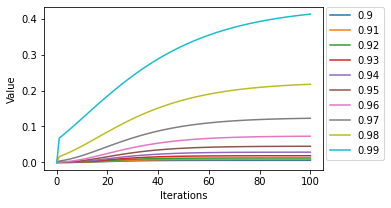

In [13]:
# checking discount with epsilon=0.01 --v[0]
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
for discount in discount_lst:
    y = [0]
    values = 0
    for i in range(100):
        try:
            mdp = mdptoolbox.mdp.ValueIteration(P, R, discount,epsilon=0.01, max_iter=1, initial_value=values)
        except OverflowError:
            break
        mdp.run()
        y.append(mdp.V[0])
        values = mdp.V
    #plt.figure(figsize=(8,6))    
    #plt.plot(range(2, i+2), y[2:], label = discount)
    plt.plot(range(i+2), y, label = discount)
#plt.figure(figsize=(8,6))    
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

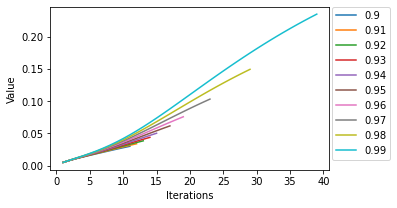

In [255]:
# checking discount with epsilon=0.01 --mean value
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for discount in discount_lst:
    max_v_lst11=[]
    time_lst11 = []
    iter_lst11=[]
    mean_v_lst11=[]
    error_lst11 =[]
    #v0_lst11=[]
    vi = mdptoolbox.mdp.ValueIteration(P, R, discount,epsilon=0.01, max_iter=100)
    vi.setSilent()
    stats1=vi.run()
    
    for i in stats1:
        max_v_lst11.append(i['Max V'])
        mean_v_lst11.append(i['Mean V'])
        time_lst11.append(i['Time'])
        iter_lst11.append(i['Iteration'])
        error_lst11.append(i['Error'])
        #v0_lst11.append(i['V[0]'])
    plt.plot(iter_lst11, mean_v_lst11, label = discount)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

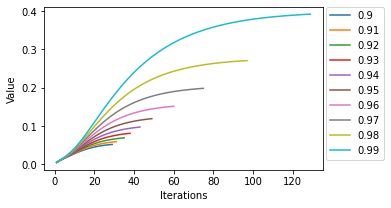

In [14]:
# checking discount with epsilon=0.001 --mean value
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for discount in discount_lst:
    max_v_lst11=[]
    time_lst11 = []
    iter_lst11=[]
    mean_v_lst11=[]
    error_lst11 =[]
    #v0_lst11=[]
    vi = mdptoolbox.mdp.ValueIteration(P, R, discount,epsilon=0.001, max_iter=100)
    vi.setSilent()
    stats1=vi.run()
    
    for i in stats1:
        max_v_lst11.append(i['Max V'])
        mean_v_lst11.append(i['Mean V'])
        time_lst11.append(i['Time'])
        iter_lst11.append(i['Iteration'])
        error_lst11.append(i['Error'])
        #v0_lst11.append(i['V[0]'])
    plt.plot(iter_lst11, mean_v_lst11, label = discount)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

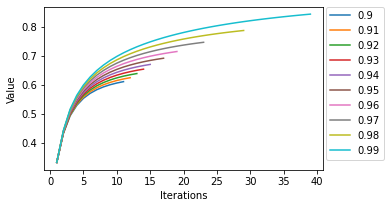

In [15]:
# checking discount with epsilon=0.01 --max value
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for discount in discount_lst:
    max_v_lst11=[]
    time_lst11 = []
    iter_lst11=[]
    mean_v_lst11=[]
    error_lst11 =[]
    #v0_lst11=[]
    vi = mdptoolbox.mdp.ValueIteration(P, R, discount,epsilon=0.01, max_iter=100)
    vi.setSilent()
    stats1=vi.run()
    
    for i in stats1:
        max_v_lst11.append(i['Max V'])
        mean_v_lst11.append(i['Mean V'])
        time_lst11.append(i['Time'])
        iter_lst11.append(i['Iteration'])
        error_lst11.append(i['Error'])
        #v0_lst11.append(i['V[0]'])
    plt.plot(iter_lst11, max_v_lst11, label = discount)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

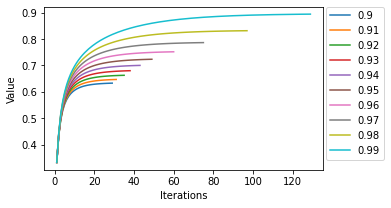

In [16]:
# checking discount with epsilon=0.001 --max value
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for discount in discount_lst:
    max_v_lst11=[]
    time_lst11 = []
    iter_lst11=[]
    mean_v_lst11=[]
    error_lst11 =[]
    #v0_lst11=[]
    vi = mdptoolbox.mdp.ValueIteration(P, R, discount,epsilon=0.001, max_iter=100)
    vi.setSilent()
    stats1=vi.run()
    
    for i in stats1:
        max_v_lst11.append(i['Max V'])
        mean_v_lst11.append(i['Mean V'])
        time_lst11.append(i['Time'])
        iter_lst11.append(i['Iteration'])
        error_lst11.append(i['Error'])
        #v0_lst11.append(i['V[0]'])
    plt.plot(iter_lst11, max_v_lst11, label = discount)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

In [17]:
# checking epsilon with number of iterations and time and V[0]
epsilon_lst=[0.001, 0.005, 0.01, 0.05, 0.1]
def find_iter_value (P, R, epsilon_lst, discount=0.99,  max_iter=1000):
    iter_lst=[]
    value_lst = []
    time_lst= []
    for epsilon in epsilon_lst:
        mdp = mdptoolbox.mdp.ValueIteration(P, R, discount, epsilon , max_iter)
        mdp.run()
        value_lst.append((mdp.V[0]))
        iter_lst.append(mdp.iter)
        time_lst.append(mdp.time)
    return value_lst, iter_lst, time_lst

In [18]:
value_lst, iter_lst, time_lst = find_iter_value(P, R, epsilon_lst, discount=0.99,  max_iter=1000)

In [19]:
df_v_iters = pd.DataFrame(list(zip(value_lst, iter_lst, time_lst, epsilon_lst)),
               columns =['Value', 'Iterations', 'Time', 'Epsilon'])

In [20]:
df_v_iters

,Value,Iterations,Time,Epsilon
0,0.405424,129,0.010617,0.001
1,0.256534,71,0.005827,0.005
2,0.067679,39,0.002896,0.010
3,0.000000,5,0.000400,0.050
4,0.000000,3,0.000348,0.100


In [267]:
# checking epsilon with number of iterations and time and max V
epsilon_lst=[0.001, 0.005, 0.01, 0.05, 0.1]
def find_iter_value (P, R, epsilon_lst, discount=0.99,  max_iter=1000):
    iter_lst=[]
    value_lst = []
    time_lst= []
    for epsilon in epsilon_lst:
        mdp = mdptoolbox.mdp.ValueIteration(P, R, discount, epsilon , max_iter)
        mdp.run()
        value_lst.append(max(mdp.V))
        iter_lst.append(mdp.iter)
        time_lst.append(mdp.time)
    return value_lst, iter_lst, time_lst

In [268]:
value_lst, iter_lst, time_lst = find_iter_value(P, R, epsilon_lst, discount=0.99,  max_iter=1000)

In [269]:
df_v_iters = pd.DataFrame(list(zip(value_lst, iter_lst, time_lst, epsilon_lst)),
               columns =['Value', 'Iterations', 'Time', 'Epsilon'])

In [270]:
df_v_iters

,Value,Iterations,Time,Epsilon
0,0.894212,129,0.010916,0.001
1,0.880097,71,0.005424,0.005
2,0.842944,39,0.002875,0.010
3,0.599427,5,0.000418,0.050
4,0.515933,3,0.000241,0.100


0.001
0.005
0.01
0.05
0.1


Text(0, 0.5, 'Value')

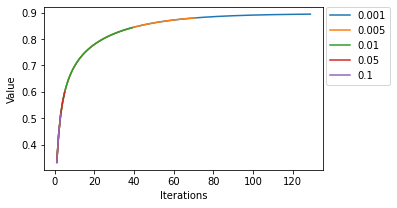

In [277]:
# checking epsilon 
plt.rcParams["figure.figsize"] = (5,3)

epsilon_lst = [0.001, 0.005, 0.01, 0.05, 0.1]

for epsilon in epsilon_lst:
   # print(epsilon)
    max_v_lst11=[]
    time_lst11 = []
    iter_lst11=[]
    mean_v_lst11=[]
    error_lst11 =[]
    #v0_lst11=[]
    vi = mdptoolbox.mdp.ValueIteration(P, R, 0.99, max_iter=1000, epsilon=epsilon)
    vi.setSilent()
    stats1=vi.run()
    
    for i in stats1:
        max_v_lst11.append(i['Max V'])
        mean_v_lst11.append(i['Mean V'])
        time_lst11.append(i['Time'])
        iter_lst11.append(i['Iteration'])
        error_lst11.append(i['Error'])
        #v0_lst11.append(i['V[0]'])
    plt.plot(iter_lst11, max_v_lst11, label = epsilon)
    print(epsilon)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

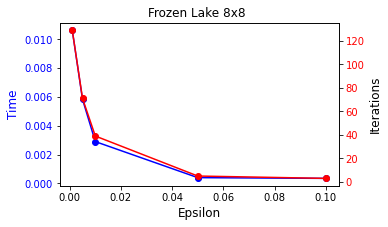

In [21]:
fig,ax1 =plt.subplots(figsize=(5,3))
ax1.set_xlabel('Epsilon', fontsize=12)
ax1.set_ylabel('Time', color='b',fontsize=12)
ax1.plot(epsilon_lst, time_lst, 'o-',color='b', label='fitness')
ax1.tick_params(axis='y', labelcolor='b')

ax2=ax1.twinx()
ax2.set_ylabel('Iterations',fontsize=12)
ax2.plot(epsilon_lst,iter_lst , 'o-', color='r',label='time' )
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Frozen Lake 8x8 ')
plt.show()

In [22]:
# small problem with VI
mdp1_8 = mdptoolbox.mdp.ValueIteration(P, R, 0.99, epsilon=0.001, max_iter=1000 )
mdp1_8.setVerbose()
stats1_8=mdp1_8.run()

 Iteration   Variation
         1    0.333333
         2    0.110000
         3    0.072600
         4    0.059895
         5    0.047437
         6    0.040440
         7    0.034009
         8    0.030259
         9    0.028597
        10    0.025727
        11    0.024255
        12    0.022692
        13    0.021251
        14    0.020691
        15    0.019372
        16    0.018751
        17    0.018090
        18    0.017271
        19    0.016961
        20    0.016262
        21    0.015775
        22    0.015425
        23    0.015169
        24    0.014914
        25    0.014670
        26    0.014317
        27    0.013990
        28    0.013620
        29    0.013290
        30    0.012987
        31    0.012607
        32    0.012274
        33    0.011884
        34    0.011537
        35    0.011149
        36    0.010800
        37    0.010424
        38    0.010081
        39    0.009722
        40    0.009392
        41    0.009051
        42    0.008737
        43 

In [23]:
max_v_lst33=[]
time_lst33 = []
iter_lst33=[]
mean_v_lst33=[]
error_lst33 =[]
for i in stats1_8:
    max_v_lst33.append(i['Max V'])
    mean_v_lst33.append(i['Mean V'])
    time_lst33.append(i['Time'])
    iter_lst33.append(i['Iteration'])
    error_lst33.append(i['Error'])
#print(max_v_lst, time_lst, iter_lst)

Text(0.5, 1.0, 'Frozen Lake 8x8')

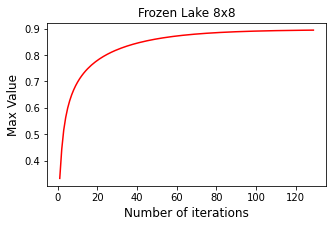

In [24]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst33, max_v_lst33,  color='r')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
#plt.legend(loc='lower right',fontsize=10)
plt.title('Frozen Lake 8x8')

Text(0.5, 1.0, 'Frozen Lake 8x8')

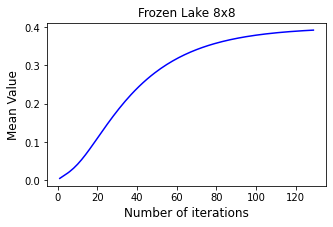

In [25]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst33, mean_v_lst33,  color='b')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Mean Value',fontsize=12)
plt.title('Frozen Lake 8x8')

Text(0.5, 1.0, 'Frozen Lake 8x8')

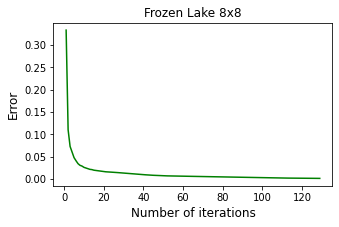

In [26]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst33, error_lst33,  color='g')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.title('Frozen Lake 8x8')

In [27]:
arrows = ['\u2190', '\u2193', '\u2192', '\u2191']
for i in range(8):
    for j in range(8):
        print(arrows[mdp1_8.policy[i*8+j]], end=' ')
    print()
    
print()
problem.env.render()
print()
for i in range(8):
    for j in range(8):
        print(mdp1_8.policy[i*8+j], end=' ')
    print()
    

↑ ↑ ← ← ← ← → → 
← ← → ↓ ↓ ↓ → ↓ 
← ↓ → → → → ↓ ↓ 
← → → → → → → ↓ 
↓ → → → → → → ↓ 
← → ↑ ↑ ↑ ↑ ↑ → 
← ← ← ← ← ← ← → 
← ← → ↓ ↓ ← ← ← 


SFFHFHFF
FHFFFFFF
HFFFFFFF
HFFFFFFF
FFFFFFFF
HFFFFFFF
HHFHHFHF
HHFFFFHG

3 3 0 0 0 0 2 2 
0 0 2 1 1 1 2 1 
0 1 2 2 2 2 1 1 
0 2 2 2 2 2 2 1 
1 2 2 2 2 2 2 1 
0 2 3 3 3 3 3 2 
0 0 0 0 0 0 0 2 
0 0 2 1 1 0 0 0 


In [39]:
# bigger frozen lake

In [28]:
np.random.seed(41)
random_map = generate_random_map(size=35)
prob2= gym.make('FrozenLake-v0', desc=random_map)
prob2.reset()
#prob2.seed(1)
#prob2.env.step(1)
prob2.render()


SFFFFFFFHFFFFFFFFFFFFFFFFFFFFFFFFFH
FFHFFFFFFFFHHFFFHFFFFFFHFHHHHFFFFFF
FFFFFFFFFFFFFHFFHFFHFFFFFFHFFFFFFFF
FFFHFFFFFFFFFFFHFFFFFHFFFFFHFFFFFFF
FFFFFHFFFFFHFFHFFHFFFFFFFFFHFHFFFHF
FFFFHFFFFFHFFFHFHFFFHFFFHFFFFFFFHFF
HHHFFFFFFHFFFHHFFHFFFHFHFHFFFFFFFFF
FHFFFFFFHFFFFFFFFFHFFFFFFFHHHHHFFFF
FFFFFHFFFHHFFFFFHHFFHFFFFFFFFFHFFFF
FFFFFFFFFFFFFHFFFFFFFFFFFFFFHFFFFFF
FFFFHHFFFFFFFFFHFFHFFFFHFFFFFHFFFFF
FHHFFFHFFFFFFHFFFFFFFHFFFHFFFHFFHHF
FFFFFFHFFFFFFHFHFFFFHFFFFFFHFFFFFFF
FFFFFFFFHFFFHFFFFHHFHFFFHFFFFHHFHFF
FFFFFFFFFHFFFFFFFFHFFHFHFFFFHFFFFFF
FFFFHFFFFFHFFFFFFFFFFFHFFFFHHFFFHHF
FFFFFFFFFHFFFHFFFFHFHHFFFFFHFFHFFFF
FHFFFFFHFFFFFFHFFFFFFFFFFFHFHFHFFHF
FFFFFFFHFFFFFFFFFFFFFFFFFHFFFHHFFHH
HFFFFFFFFFHFHFFFFHFFFFFFFFFFFHHFFFF
HHFHFFFFFFFHHFFFFFFHFFFFHFFFFFHHFFF
HFFFFFFFFFFFFFFFFHHFHFHFFFHFFFFFFFF
FFHFFFFFFFFFHFFHFFHFFFFFFFFFFFHFFHF
HFFFHFFFFFFFHFFFHFFFFFFHFFFFFFFHFHF
FFHFHHFFHFFFFHFHFFFFFHFFHFFFFHHFFFH
HFHFFFFFFFFFFFFFFFHFHFFFFFFFHHFFFHH
FFFHFFHFFFFFHFFFFFFFFHHHFFFFFFFHFHF
FHFFFFHFFHFHFHFHFHHFHFFFFHF

In [29]:
prob2.env.nA

4

In [30]:
prob2.env.nS

1225

In [31]:
env2 = prob2.env
P2 = np.zeros((env2.nA, env2.nS, env2.nS))
R2 = np.zeros((env2.nA, env2.nS, env2.nS))
for a in range(env2.nA):
    for s in range(env2.nS):
        transitions = env2.P[s][a]
        for transition in transitions:
            P2[a, s, transition[1]] += transition[0]
            R2[a, s, transition[1]] = transition[2]

Text(0, 0.5, 'Value')

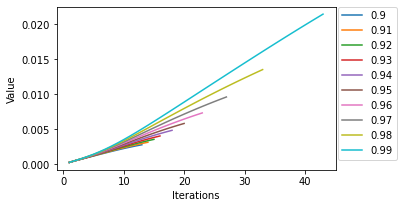

In [33]:
# checking discount with epsilon 0.01 -- mean v
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for discount in discount_lst:
    max_v_lst22=[]
    time_lst22 = []
    iter_lst22=[]
    mean_v_lst22=[]
    error_lst22 =[]
    #v0_lst22=[]
    vi = mdptoolbox.mdp.ValueIteration(P2, R2, discount,epsilon=0.01, max_iter=100)
    vi.setSilent()
    stats2=vi.run()
    
    for i in stats2:
        max_v_lst22.append(i['Max V'])
        mean_v_lst22.append(i['Mean V'])
        time_lst22.append(i['Time'])
        iter_lst22.append(i['Iteration'])
        error_lst22.append(i['Error'])
        #v0_lst22.append(i['V[0]']data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZMAAADQCAYAAADCp4wXAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy86wFpkAAAACXBIWXMAAAsTAAALEwEAmpwYAABAyElEQVR4nO3dd3zV1f348de5N3snZO+9CAQIS7DiQrFicfWLo2rtsLbVqtVatY7WDsVWrbtui1W0xVHq1lZ/RYEQNgSyCNl7Jzf3Jnec3x/3oikyEpKQ9X4+Hnnk3s865xNC3vd8zjnvo7TWCCGEEMNhGOsKCCGEmPgkmAghhBg2CSZCCCGGTYKJEEKIYZNgIoQQYtgkmAghhBg2t7GuwIkQGhqqExMTx7oaQohJZuvWrS1a67CtW7eGu7m5PQfkMHk/pDuAPTab7Qd5eXlNh+6cEsEkMTGRLVu2jHU1hBCTjFKqEsDNze25yMjIrLCwsHaDwTApJ+85HA7V3Nyc3dDQ8BzwrUP3T9YIKoQQJ1JOWFhY12QNJAAGg0GHhYV14mx9fX3/Ca6PEEJMRobJHEgOct3jYeOGBBMhhJgk1q5dG5CYmJgTHx+fc8cdd0Qeur+kpMTjpJNOSk9PT8+eP39+xv79+91HqmwJJkIIMQnYbDZuuumm+Pfee6+kpKSk8I033gjZunWr18BjbrjhhtjLLrustaSkZO+dd95Zd/PNN8eOVPkSTIQQU5rNoXm2upnHKhvHuirD8tlnn/kmJCT0ZWdn93t5eekLL7ywbe3atUEDjyktLfU+55xzugCWL1/e/cknnwQd7lrHY0qM5hJCiMPJ7+jh9pIa9posnB0agNYapdSwrvmLtTvjShq6fUaoigCkR/r3/vHi3OqjHVNdXe0RExPTf/B9bGxsf35+vt/AY7KysnrXrFkTfNdddzW9/PLLQSaTydDQ0GCMjIy0D7eO0jIRQkw5zf1Wrt9XyYrtZXTa7LyQk8hLOUnDDiTj3WOPPVazfv16/6ysrOzPPvvMPzw83OrmNjJtCmmZCCGmDJtD81JdC6vK6+lzaG5IiOBnCeH4Go0jVsaxWhCjJS4urr+2ttbj4Puampr/aakAJCYmWj/66KP9AJ2dnYb33nsvODQ0dNitEpBgIoSYIgo6TdxWUk1hj4VTg/35fXoMKT5exz5xgliyZImpoqLCq6ioyCMxMdH65ptvhrzyyivlA4+pr693Cw8PtxmNRu68886oSy+9tGWkypfHXEKISa2l38aN+6o4b1spHVY7z01PZE1u8qQKJADu7u48+OCDVcuWLUtPS0ubfv7557fNnTvXcuONN0a/8sorgQAffPCBf3Jyck5iYmJOU1OT23333Vc/UuWrqbBs79y5c7WkUxFiarFrzd/qWrmvvJ4eu51r48K5KTFiRB9pKaW2aq3n7ty5syI3N3fEPuWPZzt37gzNzc1NPHS7POYSQkw6O7p6+WVJNTu7zSwO8uO+9FjSfSdXS2S8GdXHXEqpZUqpYqVUmVLqtsPs91RKve7an6+USnRtX6qU2qqU2u36fvqAc/Jc28uUUo+qyT78QggxaB1WG78sruacrSU09Fl5KjuBtbNSJJCcAKPWMlFKGYEngKVADVCglFqntd474LDvA+1a61Sl1CXAKmAl0AKcp7WuU0rlAB8CMa5zngJ+COQD7wHLgPdH6z6EEOOf1pp/NLbzm7I62q02fhAbyq1JUfi7jdwjLXF0o/mYaz5QprUuB1BKvQasAAYGkxXAr12v1wKPK6WU1nr7gGMKAW+llCcQAgRorTe5rrkaOB8JJkJMWUUmM7cV17Cp08TcAB9ez00mx39E5wyKQRjNYBIDDBxvXQMsONIxWmubUqoTmIazZXLQRcA2rXWfUirGdZ2B14zhMJRS1wDXAMTHxw/jNoQQ45HJZufBikaeqWnC32jkoYw4LokKwSBPvsfEuO6AV0pNx/no66yhnqu1fgZ4BpyjuUa4akKIMaK15oOWTu4sraW2z8qlUSHcmRzNNI9x/eds0hvNDvhaIG7A+1jXtsMeo5RyAwKBVtf7WOAt4Eqt9f4Bxw/Mcnm4awohJqkqcx9X7j7A1XsqCHAzsm52Kg9nxksgcRlOCvpvfOMbaf7+/rNOO+201OMpezSDSQGQppRKUkp5AJcA6w45Zh1wlev1xcB/tNZaKRUEvAvcprX+4uDBWut6oEsptdA1iutK4J+jeA9CiHGg3+Hg0cpGlmwu4ouOHu5JieajuRnMD/I79slTxHBT0N9yyy0NTz/99IHjLX/UgonW2gZch3Mk1j7g71rrQqXUvUqpg+sHPw9MU0qVAT8HDg4fvg5IBe5WSu1wfYW79v0EeA4oA/Yjne9CTGob2ns4o6CYP5TXc/q0ANbPz+TH8eG4G6RvZKDhpqBfsWJFd0BAgON4yx/VtqHW+j2cw3cHbrt7wGsL8O3DnPc74HdHuOYWjrAGsRBi8mjpt3Hv/lr+3tBOnJcHL89IYmlo4FhX69je/mkcTXtHdjhZeHYv5z8xrlPQy4NGIcS44tCa1+rb+O3+Orrtdn4WH86NiZH4GCWV4HA99thjNddcc018VlZW6MKFC7slBb0QYlIqMpn5ZXEN+Z0mFgb6cn9GLJm+3mNdraE5RgtitIx1CnoJ9UKIMddrd/D7/XWcWVBMaa+FhzPjeGt26sQLJGNoYAp6i8Wi3nzzzZCLLrqoY+Ax9fX1bna7M3ZICnohxKTySWsXSzYX8VhVExdHhLB+fhaXRk2b9KsejrThpqDPy8vLuOKKK5I3btwYEBERMfONN94IGEr5koJeCDEmGvqs3FlawzvNnaT5ePJARhwnTbChvpKC/ivSZyKEOKHsWvNibQv3l9dj05rbkiL5SXw4HgZ5UDKRSTARQpwwu7t7uaXYuc7IqcH+3J8RS6K351hXS4wACSZCiFFnstl5oKKBZ6ubmebhxl+yE1gRHiT9IpOIBBMhxKj6qKWT20tqqO2zcmX0NO5IjiLIXf70TDbyLyqEGBX1ff3cWVrLu82dZPh6sS47QXJpTWISTIQQI8quNS/VtnCfq4P9juQoro0Lkw72SU7+dYUQI6awx8zyraX8qrSWvABfPpufyc8SIiSQnCDHm4J+w4YN3rNmzcpMTU2dnp6env3ss88GD7Vs+RcWQgybyW7n3rI6ztpSTJWlnyezE3gtN1lGap1Aw0lB7+fn53j55ZcPlJWVFX700Ueld9xxR1xLS4txKOVLMBFCDMt/Wrs4dXMxT1Y3cUlkCJ8vyOTCiGAZqXWCDScF/cyZM/tmzJjRB878XSEhIbb6+vohdYNIn4kQ4rg091u5u7SWt5o6SPPx5K3ZqRNuBvtouOuLu+LK2stGNAV9anBq728X//aEpKD/9NNPfaxWq8rOzu4bSh0lmAghhsShNWvq27h3fx1mu4NbEiO5PiEcT+kXGfeOlYK+srLS/eqrr05+/vnnDxiNQ3rKJcFECDF4pSYLvyiuZpMrRfwfM+JI8/U69olTyLFaEKNluCno29raDOecc07qPffcU3vGGWeYhlq+fJQQQhxTn8PBgwcaOKOgmCKThYcy4nhzdqoEknFkOCnoLRaLOvfcc1MvueSS1quvvrr9eMqXYCKEOKr8jh7OLCjmjxUNnBsWyPoFmVwWPQ2DdLCPK8NJQf/CCy8EFxQU+L366quhmZmZ2ZmZmdkbNmwY0mIykoJeCHFYnVYbvy+vZ3VdK7Fe7qxKj+OMaUNa4mLSkxT0X5E+EyHE/9Ba825zJ78qraG538aP4sK4NTESX7ehdciKqUWCiRDiS3WWfm4vreHDli5m+HmzemYyuf4jOspVTFISTIQQ/5NPy641d6dEc01sGG4G6RcRgyPBRIgpbl+PmVuKq9na1cuSYH8eyIglQdKgiCGSYCLEFGWxO3ikspHHq5rwdzPweFY8F0kaFHGcJJgIMQVt7OjhF8XVlPX2cXFEML9JjWGah/w5EMdvVOeZKKWWKaWKlVJlSqnbDrPfUyn1umt/vlIq0bV9mlLqU6VUj1Lq8UPO+cx1zR2ur/DRvAchJpNOq41fFFdzwfYy+h2a13KTeTw7QQLJJHG8KehLSko8srOzszIzM7NTU1OnP/DAA2FDLXvUgolSygg8AZwDZAOXKqWyDzns+0C71joVeBhY5dpuAe4CbjnC5S/XWs9yfTWNfO2FmHzebe7glM1FvFLXyo/jwvh0fganhsi8kcliOCno4+PjrVu3bi0qKirau3Xr1n2PPPJIZEVFhftQyh/Nlsl8oExrXa617gdeA1YccswK4K+u12uBM5RSSmtt0lp/jjOoCCGGoaHPyvd2H+D7eyoI93Dn/bnp3JMag+8QE/mJ8W04Kei9vLy0t7e3BjCbzcrhcAy5/NFs28YAAxOe1QALjnSM1tqmlOoEpgHHmkn6olLKDrwB/E4fZhq/Uuoa4BqA+Pj447oBISYyh9b8ra6V3+6vw6o1d6VE8yMZ7jvq6u74VVxfaemITs7xTEvrjf7D70c1BX1ZWZn7N7/5zbTq6mrPu+++uyYxMdE6lDpOxNxcl2utZwDfcH1dcbiDtNbPaK3naq3nhoUN+fGfEBNaWa+FC7eXcWtJDbn+Pnw2P5OfxodLIJniHnvssZr169f7Z2VlZX/22Wf+A1PQp6amWktKSvbu27dvz6uvvhpaXV09bhbHqgXiBryPdW073DE1Sik3IBBoPdpFtda1ru/dSqlXcT5OWz1SlRZiIut3OHiyqomHKhrxMRp4ODOOSyJDZLjvCXSsFsRoGW4K+oHHZGZmmj/55BP/oWQQHs2WSQGQppRKUkp5AJcA6w45Zh1wlev1xcB/DvfI6iCllJtSKtT12h1YDuwZ8ZoLMQFt6zJx9pYS7j/QwLKwQP47P5NLo6ZJIJkihpOCfv/+/e49PT0KoLm52VhQUOA3ffr0IfVZj1rLxNUHch3wIWAEXtBaFyql7gW2aK3XAc8DLyulyoA2nAEHAKVUBRAAeCilzgfOAiqBD12BxAh8Ajw7WvcgxERgstlZdaCBZ2uaifR0568zkjg7NHCsqyVOsIEp6O12O5dddlnLwRT08+bNM11++eWdH3zwgf+vf/3rGKUUCxYs6H7ppZeqAHbt2uX9y1/+MlYphdaa6667rmH+/PnmoZQvKeiFmMA+be3iFyXV1FisfDcmlF8lR+Ev2X1PGElB/xWZqSTEBNTab+OeslrWNraT5uPJP2ensiDI79gnCjFKJJgIMYForXmrqYM7S2vostm5KSGCGxIi8DJOxIGZYjKRYCLEBFFr6efW4hr+3dbFbH8fHsqMI8tvSCurCjFqJJgIMc45XGuN/L68HoeGe1Oj+X5sGMZRHKXV3b0PH59EjEYJVmJwJJgIMY6VmizcXFzN5k4Tp7rWGokfpbVGtNa0t2+gsupZ2trWk5F+L7Gxl49KWWLykWAixDjU73DwRFUTD1c04ms08GhWPN8epbVGHA4bTc3vU1X5LN09hXh4hJKSfAsREctHvCwxeUmvnRDjzPauXs7eUsKqAw2cExbIfxdk8n+jMIvdbu+lumY1GzedQWHhjdgdvWRm/oFFJ/2XxMQf4+4uc1UmmuNNQX9QW1ubISIiYuaVV1455ISG0jIRYpww2e08UO6cfBjh6c7qGUmcNQqTD63WdqprXqamZjVWazuBgXNIT7uT0NAzUEo+X05UB1PQf/jhhyXJycnW3NzcrIsuuqgjLy/vy5nsB1PQX3/99a3r1q3zv/nmm2PffvvtAwf333zzzTHz58/vPp7yJZgIMQ78t62bW4qrqbL0c2X0NO5MiSZghCcfms21VFU/T13d33E4zISGnkFC/DUEBc0d0XLE2BiYgh7gYAr6vLy8hoPHuFLQV4MzBf1ll12WenDf+vXrfZqbm93POuuszi1btvgOtXwJJkKMoQ6rjV+X1fFaQxsp3p68NTuVk0Z48mFPTwmVVU/T2PgOAJER3yI+/of4+aWPaDnC6d+r98W11faMaAr6kBi/3jOuzBq1FPRhYWH2m2++OW7NmjXl77777nGtmCbBRIgx8k5TB3eU1tBqtXF9fDg3J0aO6OTDzs7tVFT+hZaWTzAafYiNvZL4uKvx8ooesTLExPLYY4/VXHPNNfFZWVmhCxcu7D6Ygn7VqlVhZ511VkdKSsqQ1jAZSIKJECdYY5+VO0preLe5kxl+3rwyM5kZ/iPzQVZrTVvb51RUPkVHRz5ubkEkJd1AXOwVuLsHj0gZ4uiO1YIYLcNJQb9p0ya/goICvxdffDG8t7fXYLVaDX5+fvYnn3zy0GVDjmjQwUQp5aO17h3s8UKI/6W1Zk1DG78pq6PP4eBXyVH8OG5kFqzS2kFz80dUVD5Jd3chnp6RpKX+iujolbi5Dfnxt5iABqagT0xMtL755pshr7zySvnAY+rr693Cw8NtRqPxf1LQr1u37stO+EcffXTali1bfIcSSGAQwUQptQh4DvAD4pVSucCPtNY/GUpBQkxlleY+bimuZn17DycF+fJgRjzJPsOffOhwWGlsXEdF5dP09u7H2zuRrMz7iIxcgcEwOpMbxfg0nBT0I+GYKeiVUvk4F65ap7We7dq2R2udM1KVGG2Sgl6MFbvWPFfTzP3l9bgpxV0p0XwnehqGYc4Zsdst1NevpbLqGSyWWvz8skhM+DHh4ctQSlLQnyiSgv4rg3rMpbWuPmTClP1IxwohnPb1mPl5UTXbu3tZOi2AVemxRHt5HPvEo7DZTNTWvUpV1XP097cQGDCbjPTfMG3aqbKiohhTgwkm1a5HXdq1wuENwL7RrZYQE1efw8GjlY08WtlEgJuRv2QnsCI8aFh/7K3WLmpqVlNV/SI2WwchwYtJnP4IQUELJIiIcWEwweRa4BEgBqgFPgJ+OpqVEmKi2tpp4qaiakp6LVwcEcxvUmOY5nH8gyb7+9uorn6R6prV2O09hIaeQWLCTwgMnDVylRZiBBzzt1xr3QJI6lAhjsJkt7PKlQol2tOdV2Ymc8a045r7BUBfXzNV1c9RW/sqdruZ8LBlJCb+BH//7BGstRAjZzCjuV4EvtZLr7X+3qjUSIgJ5r9t3dxcXE21pZ+rXeuw+x1nKhRLXwOVlc9QV/caDoeVyIjzSEj8MX6+aSNcayFG1mDa3+8MeO0FXADUjU51hJg4Oqw2frO/jjX1zlQob89OZeFxpkIxm2uprHqaurp/AHYiIy8gMeFafHySRrbSQoySwTzmemPge6XUGuDzUauREBPAu80d3F7iTIXys/hwfn6cqVDM5moqKp6kvuFNQBEVdRGJCdfi7R038pUWk97atWsDbrnllniHw8F3vvOdlj/84Q8NA/eXlJR4XHXVVYmtra1uQUFB9jVr1pQfTKFiNBrz0tLSzADR0dH9//nPf8qGUvbx9AymAeHHcZ4QE15Tn5XbXalQcvy8+dvMZGYeRyoUs7mKioqnXEHEQHT0JSQm/EjyZonjNtwU9J6eno6ioqK9x1v+YPpMunH2mSjX9wbgl8dboBATkdaa1xva+HVZHWZXKpRr48JxH2IqlN7eSioqn6Sh4S2UMhITcykJ8T/CyytqlGouporhpqAfrsE85vIfqcKEmIiqzH3cWlzDZ+3dLAj05cHMOFJ9vIZ0jd7eSioqnqCh8W2UciMm5jskJvwIT8+IUaq1GCsfPvXnuJbqyhFNQR8al9B79o9vHLUU9JGRkfb+/n5DTk5OltFo1LfcckvDFVdc0TGUOh4xmCil5hztRK31tqEUJMREY9eaF2tb+EN5PQq4Lz2Wq4aYCuV/WyJuxMZcQULCj/D0lCfF4sQ7Ugp6gNLS0l1JSUnWvXv3eixdujRjzpw55unTp/cN9tpHa5k8eJR9Gjj9WBdXSi3DOeHRCDyntb7/kP2ewGogD2gFVmqtK5RS04C1wDzgJa31dQPOyQNeAryB94Ab9LESjAkxRCUmCzcXVVPQZeK0EH/+mBFH7BBSoZjNVRyoeJKGhjdRyihBZAo5VgtitAwnBT1AUlKSFSA7O7t/4cKF3Zs3b/YZkWCitT5tqDczkHJmm3sCWArUAAVKqXVa64EdPN8H2rXWqUqpS4BVwErAAtwF5Li+BnoK+CGQjzOYLAPeH05dhTjI6tA8UdXIQxWN+BoNPJYVz8URwYNOWWI211BR8QT1DW+ilEEeZ4kTZjgp6Jubm41+fn4Ob29vXV9f77Zlyxa/O+64o+HwJR3eoEZzKaVygGyc80wA0FqvPsZp84EyrXW56xqvASuAgcFkBfBr1+u1wONKKaW1NgGfK6X+p3NIKRUFBGitN7nerwbOR4KJGAG7unu5qaiKwh4L3woP4vdpMYR5uA/qXIuljorKp1zzRBQxMZeRmHCtBBFxwgwnBf2OHTu8fvrTnyYopdBac+ONNzYMHAU2GIMZzXUPcCrOYPIecA7OeSbHCiYxwMDmXg2w4EjHaK1tSqlOYBpwpFTOMa7rDLxmzBHqfQ1wDUB8fPwxqiqmMrPdwZ8qGvhLdROh7m68mJPIOWFBgzq3r6+RisqnqK19HdBER68kMeFaGZ0lxsTKlSs7V65c2Tlw25///OcvJ5lfffXV7VdffXX7oectXbrUVFJSctzDgmFwLZOLgVxgu9b6aqVUBPC34RR6ImitnwGeAed6JmNcHTFObWjv4ZbiasrNfVwWFcI9KdEEuh/7v0V/fwsVlU9TW/sKWtuJirqYxISf4O192M82Qkx6gwkmFq21QyllU0oFAE3AYKbn1h5yXKxr2+GOqVFKuQGBODvij3bN2GNcU4hj6rbZ+e3+OlbXtRLv5cE/clP4RsixR8Fbre1UVj5Ldc1qtO4nMuJ8kpKuw9v7+Fq/HR0d7Nixg7179/K9730PL6+hDTkWYrw42tDgJ4A1wGalVBDwLLAV6AE2DuLaBUCaUioJ5x/8S4DLDjlmHXCV63oXA/852sgsrXW9UqpLKbUQZwf8lcBjg6iLEF/6uKWTX5bUUN9n5UexYdyaHImv8eiJGa3WLqqrX6Cq+kXsdhMREeeRnPSz48qdZbVa2bdvHzt27KC83Nk/mpSUhMlkkmAiJqyjtUxKgD8C0YAJZ2BZirMDfNexLuzqA7kO+BDn0OAXtNaFSql7gS1a63XA88DLSqkyoA1nwAFAKVUBBAAeSqnzgbNcI8F+wldDg99HOt/FILX027i7rJY3G9tJ9/HinTmJ5AX6HvUcm81ETc1qKquexWbrJCxsGclJN+Dnlz6ksrXW1NXVsX37dnbv3k1fXx+BgYGceuqp5ObmEhwcPJxbE2LMHW1o8CPAI0qpBJx/5F/A+Qd8jVLKrLUuPdbFtdbv4ey0H7jt7gGvLcC3j3Bu4hG2b+Hrw4WFOCKtNf9s6uCO0hq6bQ5uTozgZwkReBqOnJjRbu+jtu5VKiqewmptJXTa6SQn34i///Qhld3b28uuXbvYvn07jY2NuLm5kZ2dzaxZs0hMTMRwlDoIMZEMJp1KJc75H6uUUrNxBpW7cbY2hBjX6iz93FZSw0etXczy9+HhzDiy/LyPeLzDYaW+fi0HKh6nr6+B4OBFpCT/nMDA2YMu0+FwUFFRwbZt29i3bx92u53o6GjOPfdcZsyYIY+yxKQ0mKHBbjiHA18CnAF8xldzQ4QYlxxa80p9K/eW1WHTml+nRPPDuDCMR5h8qLWdhsZ/ceDAI5jNVQQGzCY7+0+EBJ806DK7u7vZsWMH27Zto729HS8vL/Ly8pgzZw6RkZEjdWtCHNFwUtCXlpZ6fPe7302or6/3UErx3nvvlWZkZPQfvqSvO1oH/FLgUuCbwGbgNeAa14RCIcat8t4+bi6uYmOHicVBfjyYGUeit+dhj9Va09LyMfvLH8JkKsXPL5vcmc8xbdqpg5r17nA42L9/P1u3bqWkpASHw0FiYiKnn346mZmZuLsPbtKjEMM13BT0l19+edLtt99ef8EFF3R1dnYahvoI9mgtk9uBV4GbtdZfm+QixHhjc2j+Ut3Enyoa8DAoHsqI49KokCMGhba2L9hf/iBdXTvx8UkiZ/qjhIefg1LH/k/U3d3Ntm3b2LZtG52dnfj4+LBw4ULmzJlDaGjoSN+aEMc0nBT0W7du9bLb7VxwwQVdAIGBgY6hln+0DvhjJnIUYrzY093Lz4uq2dVj5pzQQO5LjyXS8/Ctgs7OHewv/xPt7Rvx9IwiK/N+IiMvwGA4+lNfh8PBgQMH2LJlC0VFRWitSUpKYunSpWRmZnIw+6qY2trWlsRZG0wjmoLePdK3N+Ti9FFLQb93716vgIAA+1lnnZVSXV3tecopp3Q98cQTNUP5nZbffjGhWewOHq5s5PGqRkLc3Xh2eiLLwwIP2xrp6SmhvPwhmls+xt09hLS0O4mJvgyj8fCPwA4ymUzs2LGDLVu20N7ejre3NyeddBJ5eXlMmzZttG5NiBF3pBT0NptNbdmyxS8/P39vWlpa//Lly1Mee+yx0JtuuulIqa2+RoKJmLDyO3q4ubiast4+VkaG8OvUaIIPkwrFbK7hwIFHqG94G6PRh+SkG4mLuxo3N7/DXNVJa01NTQ0FBQUUFhZit9uJj4/ntNNOIysrS/pCxBEdqwUxWoaTgj4+Pr4/MzPTfPAR2be+9a32TZs2Hfk/yGFIMBETTrfNzu/L63mptoU4Lw9ez01hyWFSofT3t3Cg4klqa9egFMTHf4/EhGtxdz/yBMH+/n52795NQUEBDQ0NeHh4MGfOHObNm0d4uKxFIsav4aSgX7Jkiamrq8tYV1fnFh0dbfv0008D8vLyhjTYSoKJmFAGkwrFZuumqup5qqqfx+HoIyrqYpISrz9qJt/W1lYKCgrYvn07fX19hIeHc+655zJz5kw8PY/+GEyI8WA4Kejd3Ny4//77a0499dR0gBkzZvQO5REXgJoKixTOnTtXb9myZayrIYZhYCqUDF8vHs6IY84hqVAcjj5qal+louJJrNY2wsO/SXLSTfj6Jh/2mg6Hg7KyMjZv3kxZWRkGg4Hs7GzmzZtHfHz8oBfEElOXUmqr1nruzp07K3Jzc4f0x3ei2rlzZ2hubm7iodulZSLGNa01axvbuaeslm6bg1sSI/lZQjgeA8bAa22noeFtysv/jKWvjuDgRaSm/IKAgJmHvabZbGb79u0UFBTQ3t6On58fp556Knl5efj7HztzsBDi6ySYiHGrytzHL0tq+LStm7kBPjyYGU+G71epSLTWtLZ+Stn+BzCZSvH3zyEr635CQhYf9npNTU1s3ryZnTt3YrVaiY+P54wzziArKwvjMbIGa62lpSLEUUgwEeOOXWuer2nmvvIGDAr+kBbDd2NCMQz4Y97RuZWysgfo7NyCt3fCESccOhwOSktLyc/Pp7y8HKPRyMyZM5k/fz5RUUdfDVHbHFhK2zHvbsFaZyL8Z7NRBgkoQhyOBBMxruzrMfPzomq2d/dyRkgAqzJiifX6crQjJlMZ+/f/ieaWj/HwCCUj47dER30bg+F/h+r29fWxfft28vPzaW9vx9/fn9NPP528vDx8fY+cdl5bHVhK2jHvacG8txXdZ0d5ueGdHYLud74WQnyd/M8Q44LF7uDPrsmHgW5uPJWdwPnhQV8+WrJY6jlw4FHq6tc654ok/5z4uKsxGv93onF7ezv5+flfjsqKjY095qMsbXMGkN5dzVj2tqH77Rh83PCeEYr3jFC8UoJQbpIqXoijkWAixtyG9h5+UVzNfnMf/xcZzK9TYwhxTT60WruorPwL1TUvobUmLu4qEhN+godHyJfna62prKxk06ZNFBcXo5Ri+vTpLFiwgNjY2MOWqW0OLGUdmHc1Yy50tkAMPm745IbhPSMUz5RAlFECiBCDJcFEjJlOq43fldfzsmsd9oGTD+32PmpqX6ai4klsti4iI1aQnHwT3t5fBQe73U5hYSEbN26kvr4eb29vTj75ZObNm0dAQMDXytMOTd+BTsw7m+nd3YI221BeRrxzQvGZGYpnapAEEDGhHW8K+n/961/+v/jFL+IOHnfgwAGv5557rvyKK67oGGzZEkzECae15t3mTn5VWkNzv40fx4VxS5Jz8qFzmO8/KS9/GEtfHSEh3yA15Vb8/bO/PN9sNrNt2zby8/Pp6uoiNDSU5cuXM3PmTDw8PL5WlrW2h94dzfTuasbR1Y/yMOCdPQ3vmWF4pQfLIywxKQwnBf15553Xfd555+0FaGxsNKanp884//zzu4ZSvgQTcULVWvq53bXy4Qw/b1bPTCbX38c1zPf/Ubb/AXp6ig47zLe9vZ1Nmzaxfft2+vv7SUpKYvny5aSmpn5t+Vtbq5ne7U307mjG1mIGo8IrIwSf3DC8skIweMhCoWJyGU4K+oFefvnl4CVLlnT6+/sPKQ29BBNxQti15sXaFu4rr8eh4Z6UaH4YG4abQdHVtZuy/atob9+It1c806f/mYjwc78c5ltbW8uGDRvYu3cvSilycnI46aSTvja0126yYt7VTO/2JvqrukGBZ1Ig/qfE4p0zDYOPJGcUo+/tt9+Oa2pqGtEU9OHh4b3nn3/+qKWgj4yMtB88Zu3atSE33HBD41DrKMFEjLq9PWZudg33PS3En/vTY0nw9sRsrqJo/4M0Nr2Du3sI6Wl3ExNzKQaDBw6Hg5KSYjZs2EBlZSWenp4sWrSIBQsW/E9/iLY6MO9rpXd7E5bidnBo3CJ8CDwnEe9Z4bgFSl4tIQ46Ugr6gyorK92Li4u9L7zwwiE94gIJJmIUmex2Hqpo5C/VTQQNGO5rtbZTXLKK2tpXUcqNxMSfkhD/Q9zc/LFarWzfvpWNGzfS0tJCYGAgZ599NnPmzPky4aLWmv7qbnq3NtK7swVtsWEI8MDv5Gh8ZkfgEXXkeSRCjLZjtSBGy3BS0B/cv3r16uBly5Z1eHp6DjlpowQTMSr+3drFbSU1VFv6uSwqhDtTogk0WKmsfIqKyqex23uJjv42yUk34OkZgdlsZuPG9eTn59PT00NkZCQXXXQR2dnZX84PsXX00bu9kd6tTdhazCh3A17Tp+E7J8I5EuuQ2entDXV0NjaQmDtnLH4EQpxQw0lBf9DatWtDfve739UeT/kSTMSIauyzcndZLf9s6iDNx5O3ZqeyIMCL+oY32Fv+CH39jYSGnklqyi/w9U2ls7OTzz77kK1bt9Lf309KSgoXXnghSUlJKKXQVge9e5owbWmkr6wDNHgkBhC8JBbvGaEYBsxIt9us1BbtpXxbAeXbCmivr8UnMIhr/7IaZZARW2JyG04KeoDi4mKP+vp6j29+85vdx1O+pKAXI8KhNS/XtfL78josds2NiRH8JC6M7vbP2L//j5hMpQQGzCY19TaCgubS1NTEF198we7du9Fak5OTw6JFi4iKivpyOK9pSyO9O5rRFhvGIE988iLwnROO2zTvL8s1d3c5g8fWzVTs2k6/uRejmxtx02eSNHseyXPmERQROYY/GTGZSQr6r0jLRAzbnu5ebi2pYVtXL4uD/HggI5ZQ6z4Kd9xIR2cBPj5JzMh5krCws6iurub999dQXFyMu7s7c+fO5aSTTiI4OBhHr5WeL2oxFTRibTCBmwHvnGn45kXgmfLVY6yOhnrKtmxi/5Z8aov2orUD3+AQMk46meQ584mfkYuHl/cxai2EGEmjGkyUUsuARwAj8JzW+v5D9nsCq4E8oBVYqbWucO27Hfg+YAd+prX+0LW9Auh2bbdpreeO5j2II+ux2fnjgQaerWkm2N2Nx7PiWebXTvn+n1PR/OGXiRijIi9m//4K3nnnRaqqqvD29ubUU09l/vz5eHt503egk9YPizDvaQGbxj3Wj6DzU/HJDcPg7YbWmqYD+yndvIGygk201jhb5qHxiSy44Nuk5C0gIjlVHmUJMYZGLZgopYzAE8BSoAYoUEqt01rvHXDY94F2rXWqUuoSYBWwUimVDVwCTAeigU+UUula64OjDk7TWk+JJuV4dHAG+11ltTT0Wbkiehq3xHrQVvMwm/e9jsHgRVLSjcTEXEVxUQXr/vkcTU1NBAQEsGzZMubMmYOxD0z5jTRsacDeakF5ueE7LxLfeZF4RPvhcNipLdpL2eaNlBZspLulGWUwEJuVw8wzziZl7gICw+XxlRDjxWi2TOYDZVrrcgCl1GvACmBgMFkB/Nr1ei3wuHKmiV0BvKa17gMOKKXKXNfbOIr1FYNQYe7jVyW1/Luti+l+XvwlM4LQjpcpLHgera1ER19KXOy1FBZWs+6fL9DR0UFYWBjnn38+OdNzsB3opvv1Msz72sCh8UgKJPDMBLxzpuFQmurCXZT863PKtuRj7urE6O5OYu4cFn37clLy5uPt//WcW0KIsTeawSQGGDjeugZYcKRjtNY2pVQnMM21fdMh58a4XmvgI6WUBp7WWj9zuMKVUtcA1wDEx8cP704EFruDx6uaeKyqETeluCc5gmWGj6kufIwK13rrMdE/pbCwmX+t+xsmk4nY2FiWLVtGanQSvVsbaX5oG/b2Pgy+bvidHI3vvEgMwe5U7d5JyfNrKCvYhKWnG3cvb5LnzCNt/iKSZufh4eVNX6+V2pIObNYG0udJi0SI8WYidsCfrLWuVUqFAx8rpYq01v899CBXkHkGnKO5TnQlJ5NPWrv4VUkNlZZ+VoQF8pOgfZiqb6DcXEVw0EKioq5jz54e3vnXW/T19ZGamsrJi08mwhZA7+ZGGlYXgEPjmRJI4LIkPDICqS7azaZ/rKNsy0b6TCY8vH1ImbuA9AWLScydg1JuNJR3su3DOmqK2mmq6EJrCIn2lWAixDg0msGkFogb8D7Wte1wx9QopdyAQJwd8Uc8V2t98HuTUuotnI+/vhZMxPBVW/q5u7SW91s6SfXx5PmkXsKa76alqRA/v0xSUh5lz24H7777CQ6Hg+zsbE7KW0hgjcL0RgOtLdUYfJytEJ+54TQ07WfHhtcpeWwDlu4uPLx9SJ23kPSFJxM/YxY9bVaqCtt4/+m91JV0YLM6UAZFRGIAed9MJC4zhIgkecwlxJEcbwp6gGuvvTb2k08+CXQ4HJxyyildL7zwQvWhCVSPZjSDSQGQppRKwhkILgEuO+SYdcBVOPtCLgb+o7XWSql1wKtKqYdwdsCnAZuVUr6AQWvd7Xp9FnDvKN7DlGSxO3iyuonHKhsBxc0xcEr3H+gp34DVK5bYmLvZs8eHD97fglKK3Nxc5ifNwnOfhd4XKum0aTwSAgg+PY4Orza25X9MyV2fY+pox93Ti5S5C8hYdArR6TOp399N1d42vnhjC91tzkzZQRE+ZJ0cTVxWCDFpQXh4T8QGtBAn1nBS0H/88ce+mzdv9isqKioEmDt3buZ7773nv3z58kFPYBy1/6WuPpDrgA9xDg1+QWtdqJS6F9iitV4HPA+87Opgb8MZcHAd93ecnfU24Kdaa7tSKgJ4y7WUqxvwqtb6g9G6h6lGa80HLZ3cU1ZHlaWfc4LduJzVqJo36HMPISzsevbsDuHjj8pxd3dnwbwF5PqlYtjehXVjFWZPI75zI7ElQnHRRopefJTOpkaM7u4kz55HxqJvEBw1nZqSbvb8t5WPX9iEw6Fx9zISlxnCnGUJxGeHEBAqc0SEGKrhpKBXStHX16csFovSWiubzaaio6OtQyl/VD/yaa3fA947ZNvdA15bgG8f4dzfA78/ZFs5kDvyNRWlJgt3ldbyWXs36d5GHgz+lKj2pzAYvPAL+A579kRRUdGAt3cf35i3mOy+GBybO7Bb6jFE+uK1NJIDnbvYt2ENzWsOoJSB+Bm5zD//ErwDM6kr7SX/nVa6W3cAMC3Gj1lL40nICSEiORCjrHAoJom9+34ZZ+opGdEU9L5+6b3ZWatGLQX9mWeeaVq8eHF3VFRULsB3v/vd5jlz5lgOLeNo5PnBFNdls/NwhXPiobdBcX1gIfM778NotuHt/U0K98RTU9OFv7+J02eeTErLNPT6HuzGNjyzg2nxrmf37vepfnY3aE1UagYnX/J9PPyyqC/rZ+M/27D1l+LmaSQuM5g5S+OI9GxD7d1K74cFGApjMd75q7H+MQgxJRwpBf2ePXs8S0pKvGpqanYBLFmyJP2DDz7wW7ZsWc9gry3BZIqyOTSv1rey6kADrVYb5/rWc17v7/HvaMTDYwmFe5JoaLASEuzG0rSTSaj0gc12DIH99OUY2de4iZL3P8dm7ScoMorZZ1+Eu+90mioUWz7qAl2HX7AnmQsjiQ7oIbBuJ5atmzE/t5VmkwkAj8REvLKzxvgnIcTIOlYLYrQMJwX9I488Ejpv3jxTYGCgA+DMM8/s/Pzzz30lmIij+m9bN/eU1bLPZGGWVxe/cDxCXM8ODIZ5FO5dQkuLOxEhwSyLTiW60htDPahYN2oDKtm66z16d7Tj5edP8twlePrm0Fzjw758M9BNWLw/c04KINxUhvvuzzE/vBlbdzetgEdyMgHnLcdn3jx85s3DPTx8rH8UQkwaw0lBHx8f3//iiy+GWa3WeofDob744gv/66+/fkirLUowmUL291r4TVkdH7V2Ee3Wx8+NLzHH/BGK6ewtPJ/WVn/iQqJZ7hdPRJ0PytOIKbyHXdWfUrV+D0Y3N6LSZxOdmUNbYxhVRTaUQRGdaCA1y0xIVT76/U+xN7fQD+i4ODzOXEJdZiiGvJmclHPOWP8IhJi0hpOC/uqrr27/9NNPAzIyMqYrpTjttNM6L7vsss6hlC8p6KeA5n4rD1c0srquBU9l5wK1jjNsr+NmT2Tv3jTa26eRHBRLTkcM4RY/HP5Qad3H9uIPsTr6CIlJwTckl87WWPrNbri5G4iOhAhzGQG7P0IX7wbAGBKCPW861elBbI618IWjlJqeGgAWRy/mL0v/MpY/BiFGnKSg/4q0TCaxXruDZ6qbeLyqCbPdzpmGL1hhfwFfayD79p1KV1c0Gd7xnN4fQXCjH12+Haxvf5O6A6V4+4cQnLgYU08yvb0BWG2K6AAToaZN+H/+DgZzN7i7Y52RRtVli9kQ28u/Pcow2Z3p00KtocwKm8XKjJXkhueSPS17jH8aQojRJMFkErJrzesNbTxQXk9Dv435hl18Wz9HqFlTUpxHT1cCWSqe6b1ReFndqegvZH3devpVP/5h0/ExfBu7IwaLyUCsexMh1R8RULIeo8OGPSacqlMS2BRn4cPgakxuJSgUqX4xLHdLZfa06cya9V2ifaNxzQcSQkwBEkwmEa0177d0sqq8nuLePtLVAa7Rz5Fg6qCsLIv6rhSy+2LJssbQZ+xhV9NH1JiK8QqKR/stwk2l4bC5E6OrCCl+geDGXSgPI81ZEXy8IpL3I5uoD2rDTXWS4x3BSkcseV2t5DaWEmirdFYixxv8Yo5eUSHEpCPBZBLQWvNpWzf3l9exq8dCNI38TL9Mjmk/B8qnU9p5KjMs8SQ5QqntLeHT1tX0Gq0Y3LJwC7gKozGAKFMJoaXPEdxeTN80H/ZmevPsEgO74+xojyZmuAexvN+f+S3V5PZ04q0PgFcgRM+Ghcuc32PmQIAEEiGmIgkmE9wX7d3cX15LQZeFMFq4Rr/GrO69VFdmU9e2krn98YTY3SlpLeDd3iK0RwJ4noKHezThHXsJq1pDcGcxjQk+/HuWhfxkqA01k200sqAXrm1pIrevHy+MNHqnslt9g3t1EtHTF3P9xWeDPMoSQiDBZMLa1NHDgwdqWN9hIZh2rtb/ILe9kIaqbLrbLudkWzz9PY2Udn1MgcOGcpuOh98VhLUVE17/AQGmEvYmw2uLrGxPUUzzsbHQZOHmnk7mVVkwGgLZY8jkv5aTeciawm6dhMPqTWakP9NTAsnMDJdAIoT4kgSTCURrzRcdPfypvIpNXVYCdCff4U1yWwppq56OR/t3WdIfRGNnEfm9b9Gv4nH3WEJ0ey0RTZtx71/N5mQLb5+hqE0wktdv4UxTD3e1WNBEssmWyQe2dH7nyKDBLYacmEByYgJZGR3Ib2MCSAnzw11yaAkxbg0nBf2Pf/zjmE8++SQI4NZbb6374Q9/2D6UsiWYTABaaz5r6+aP5eVs64Eg3cZ39D/JaSqlt2om4Z3fI6XHQmXXLv6fzYDRI4NQixeRTdvp419sSTHz+lwD/sFWTjb3crvZjEdNFBusM/nYkcUDKovQyHhmxgYyLzaI78cFkhrmh5sEDiEmjOGkoH/ttdcCd+7c6bN3795Cs9lsWLRoUcZFF13UGRIS4hhs+RJMxjGbQ/N+czuPHihnt9mNEN3CFY51ZNRWY6yeR2L3QiydlRwwbabPGM+03gRymnfR6fY0W9MsrFvgIMPTwjfMZs7tDWNHTS4bHdms9ZtFSlo8s+OC+H58MNOjA/ByN4717QohhmE4KegLCwu9Fi9e3OPu7o67u7sjOzu798033wz8wQ9+MOjWiQSTcchks/O32jqerqqjzuZJuG7hStt7pFa2EFKziGmdM2jsOsBOWylBfb4ktvbS7P0621K6sS2wMkeZWWryo7ojm806h5ciFpCWlcTcxGDujQ8mMtBrrG9RiEnrxn1VcUUmy4imoM/09er9c1b8qKWgnz17tvl3v/tddHd3d2NPT49hw4YNAVlZWZKCfqKq7+vnqfISXmkwYcKTNH2Aa3o/I7HSQXjNfFR7CzWWZjotXoS3t+Pjt4PdyR1Uz7eQaTOSZ0pnd2cu22JOpis3nbkJwVwcH4SPh/wzCyGOnIL+wgsv7MrPz/eZN29eZkhIiHXOnDk9RqNxSLm25K/MGNNas6mjk6fKCvl3jxcODXPZxqLWrSSXx+BXP52O7g7qeusI7WqkP2AH9UnN9M214mOOI8RxNubAU+hIz2V+8jRWRgVIX4cQY+hYLYjRMpwU9ACrVq1qWLVqVQPAeeedl5SRkdE3lPIlmIyRXruDNVWlPFdVxwFHMD4aTrd/zPzaSuJKU7A3p9HRbcZhKqI5aDe25Fr6/f2x98/EN/IafLNOYkFaJOnh/hgMMkRXiKluOCnobTYbLS0txsjISHt+fr53UVGRz4UXXnhgKOVLMDnB9nV18XTxFtZ1e9OrvInTXVzS8zFz99vxKQ+npz2CTnMpncG7caS10+GVhGfwCkIzzyQvM4mMCAkeQoivG04K+v7+frV48eJMAD8/P/tf//rXcnd39yGVLynoT4C2/n7+WrqFfzR0Um6IwqhtzLFvZVHjflIKA7HXaUyWSvpCdmOKMuAXcjLT0pczfXouWVEBGCV4CDEuSQr6r0jLZJRYHZp1B3axuryMrcZ4bMqHONXMhV3vkFfWi1+RL12mFhqnfYF1ZhwxKRcyd/Z95MSGSJ+HEGLCkWAyghxa8+/KQl7at5N8j3h6DP74G0P5hmUD86taiNzphsm0n56IRgynnMLMvF+Rm5YoczyEEBOeBJNh0lrzxYFCXtiTT75vAq2GUDw8U5lp3c2chjrStvfTayqH6f7EfO+7zJk5Dz9P+bELISYX+at2HKx2O6+t/xcftDeyyz+JZmM4Br9ZZNv2cW59ARk7OrHRQNzSs1j8uwsJ9JNJgkJMcg6Hw6EMBsOk7oR2OBwKOGyKFQkmg9TS3swT/3qFHcEB7PZNpUcl4hYYQ4athNObd5C1p4WAcE+WrPwpMd+JHOvqCiFOrD3Nzc3ZYWFhnZM1oDgcDtXc3BwI7DncfgkmR7Ep///xj6LN7AmPYp9nGv1xp+KjTUy3FDO9voHUqg7mr1jBjKWXyRK1QkxhNpvtBw0NDc81NDTkAJN1BI0D2GOz2X5wuJ2jGkyUUsuARwAj8JzW+v5D9nsCq4E8oBVYqbWucO27Hfg+YAd+prX+cDDXHK5/vPY8nzk62R0aR6lbMjp+KcG6lUU928mqbmJheAJnXfRdlGGy/r4IIYYqLy+vCfjWWNdjLI1aMFFKGYEngKVADVCglFqntd474LDvA+1a61Sl1CXAKmClUiobuASYDkQDnyil0l3nHOuaw5JvaeWNhLOIsddwdtsGcuo6uPLiqwmPPmOkihBCiElnNFsm84EyrXU5gFLqNWAFMPAP/wrg167Xa4HHlfN50QrgNa11H3BAKVXmuh6DuOaw/F/6XGaWbeDKK38yUpcUQohJbzSDSQwwMOFZDbDgSMdorW1KqU5gmmv7pkPOjXG9PtY1AVBKXQNcAxAfHz/oSs9fdDrzF50+6OOFEEJM3o4itNbPaK3naq3nhoWFjXV1hBBiUhvNYFILxA14H+vadthjlFJuQCDOjvgjnTuYawohhDjBRjOYFABpSqkkpZQHzg71dYccsw64yvX6YuA/2pl5ch1wiVLKUymVBKQBmwd5TSGEECfYqPWZuPpArgM+xDmM9wWtdaFS6l5gi9Z6HfA88LKrg70NZ3DAddzfcXas24Cfaq3tAIe75mjdgxBCiMGRFPRCCHGcDqagH+t6jAdTIpgopZqBysPsCgWmxBoEA0y1e55q9wtT757H8n4TtNYywocpEkyORCm1Zap9qphq9zzV7hem3j1Ptfsdrybt0GAhhBAnjgQTIYQQwzbVg8kzY12BMTDV7nmq3S9MvXueavc7Lk3pPhMhhBAjY6q3TIQQQoyAKRtMlFLLlFLFSqkypdRtY12f0aCUekEp1aSU2jNgW4hS6mOlVKnre/BY1nEkKaXilFKfKqX2KqUKlVI3uLZPyntWSnkppTYrpXa67vc3ru1JSql81+/2665sEZOGUsqolNqulHrH9X5S3+9EMSWDyYC1Vs4BsoFLXWuoTDYvAcsO2XYb8G+tdRrwb9f7ycIG3Ky1zgYWAj91/btO1nvuA07XWucCs4BlSqmFONcFelhrnQq041w3aDK5Adg34P1kv98JYUoGEwastaK17gcOrosyqWit/4szTc1AK4C/ul7/FTj/RNZpNGmt67XW21yvu3H+wYlhkt6zdupxvXV3fWngdJzrA8Ekul8ApVQscC7wnOu9YhLf70QyVYPJ4dZaiTnCsZNNhNa63vW6AYgYy8qMFqVUIjAbyGcS37Prkc8OoAn4GNgPdGitba5DJtvv9p+BW3GuRw7O9Y8m8/1OGFM1mAicn2xxfpKdVJRSfsAbwI1a666B+ybbPWut7VrrWTiXY5gPZI5tjUaPUmo50KS13jrWdRFfN5orLY5nU3ldlEalVJTWul4pFYXzE+2koZRyxxlIXtFav+naPKnvGUBr3aGU+hQ4CQhSSrm5Pq1Ppt/txcC3lFLfBLyAAOARJu/9TihTtWUylddFGbiGzFXAP8ewLiPK9fz8eWCf1vqhAbsm5T0rpcKUUkGu197AUpz9RJ/iXB8IJtH9aq1v11rHaq0Tcf6f/Y/W+nIm6f1ONFN20qLr082f+WpdlN+PbY1GnlJqDXAqzqyqjcA9wNvA34F4nJmU/09rfWgn/YSklDoZWA/s5qtn6nfg7DeZdPeslJqJs8PZiPOD4d+11vcqpZJxDioJAbYD39Fa941dTUeeUupU4Bat9fKpcL8TwZQNJkIIIUbOVH3MJYQQYgRJMBFCCDFsEkyEEEIMmwQTIYQQwybBRAghxLBJMBETjlKqx/U9USl12Qhf+45D3m8YyesLMVlJMBETWSIwpGCilDpW1of/CSZa60VDrJMQU5IEEzGR3Q98Qym1Qyl1kyvp4R+VUgVKqV1KqR+Bc4KbUmq9UmodsNe17W2l1FbXOiDXuLbdD3i7rveKa9vBVpByXXuPUmq3UmrlgGt/ppRaq5QqUkq94pqJj1LqftfaKruUUn864T8dIU6gqZqbS0wOt+GaBQ3gCgqdWut5SilP4Aul1EeuY+cAOVrrA67339Nat7nSkBQopd7QWt+mlLrOlTjxUBfiXDMkF2dGgQKl1H9d+2YD04E64AtgsVJqH3ABkKm11gfTnggxWUnLREwmZwFXulKy5+NMT57m2rd5QCAB+JlSaiewCWfSzzSO7mRgjStLbyPw/4B5A65do7V2ADtwPn7rBCzA80qpC4HeYd6bEOOaBBMxmSjgeq31LNdXktb6YMvE9OVBzrxOZwInuVYp3I4zC+3xGpgHyg4czGA7H+eiTcuBD4ZxfSHGPQkmYiLrBvwHvP8Q+LErDT1KqXSllO9hzgsE2rXWvUqpTJxL/B5kPXj+IdYDK139MmHAKcDmI1XMtaZKoNb6PeAmnI/HhJi0pM9ETGS7ALvrcdVLONe2SAS2uTrBmzn8Eq4fANe6+jWKcT7qOugZYJdSapsrvflBb+FcK2QnzsW1btVaN7iC0eH4A/9USnnhbDH9/LjuUIgJQrIGCyGEGDZ5zCWEEGLYJJgIIYQYNgkmQgghhk2CiRBCiGGTYCKEEGLYJJgIIYQYNgkmQgghhk2CiRBCiGH7/zDFLpN6TAgRAAAAAElFTkSuQmCC)
    plt.plot(iter_lst22, mean_v_lst22, label = discount)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

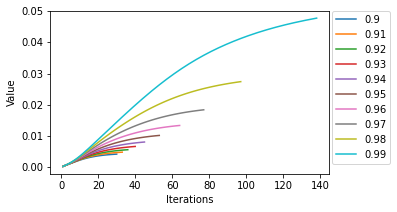

In [34]:
# epsilon had to be reduced for convergence
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for discount in discount_lst:
    max_v_lst22=[]
    time_lst22 = []
    iter_lst22=[]
    mean_v_lst22=[]
    error_lst22 =[]
    #v0_lst22=[]
    vi = mdptoolbox.mdp.ValueIteration(P2, R2, discount,epsilon=0.001, max_iter=100)
    vi.setSilent()
    stats2=vi.run()
    
    for i in stats2:
        max_v_lst22.append(i['Max V'])
        mean_v_lst22.append(i['Mean V'])
        time_lst22.append(i['Time'])
        iter_lst22.append(i['Iteration'])
        error_lst22.append(i['Error'])
        #v0_lst22.append(i['V[0]']data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZMAAADQCAYAAADCp4wXAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy86wFpkAAAACXBIWXMAAAsTAAALEwEAmpwYAABAyElEQVR4nO3dd3zV1f348de5N3snZO+9CAQIS7DiQrFicfWLo2rtsLbVqtVatY7WDsVWrbtui1W0xVHq1lZ/RYEQNgSyCNl7Jzf3Jnec3x/3oikyEpKQ9X4+Hnnk3s865xNC3vd8zjnvo7TWCCGEEMNhGOsKCCGEmPgkmAghhBg2CSZCCCGGTYKJEEKIYZNgIoQQYtgkmAghhBg2t7GuwIkQGhqqExMTx7oaQohJZuvWrS1a67CtW7eGu7m5PQfkMHk/pDuAPTab7Qd5eXlNh+6cEsEkMTGRLVu2jHU1hBCTjFKqEsDNze25yMjIrLCwsHaDwTApJ+85HA7V3Nyc3dDQ8BzwrUP3T9YIKoQQJ1JOWFhY12QNJAAGg0GHhYV14mx9fX3/Ca6PEEJMRobJHEgOct3jYeOGBBMhhJgk1q5dG5CYmJgTHx+fc8cdd0Qeur+kpMTjpJNOSk9PT8+eP39+xv79+91HqmwJJkIIMQnYbDZuuumm+Pfee6+kpKSk8I033gjZunWr18BjbrjhhtjLLrustaSkZO+dd95Zd/PNN8eOVPkSTIQQU5rNoXm2upnHKhvHuirD8tlnn/kmJCT0ZWdn93t5eekLL7ywbe3atUEDjyktLfU+55xzugCWL1/e/cknnwQd7lrHY0qM5hJCiMPJ7+jh9pIa9posnB0agNYapdSwrvmLtTvjShq6fUaoigCkR/r3/vHi3OqjHVNdXe0RExPTf/B9bGxsf35+vt/AY7KysnrXrFkTfNdddzW9/PLLQSaTydDQ0GCMjIy0D7eO0jIRQkw5zf1Wrt9XyYrtZXTa7LyQk8hLOUnDDiTj3WOPPVazfv16/6ysrOzPPvvMPzw83OrmNjJtCmmZCCGmDJtD81JdC6vK6+lzaG5IiOBnCeH4Go0jVsaxWhCjJS4urr+2ttbj4Puampr/aakAJCYmWj/66KP9AJ2dnYb33nsvODQ0dNitEpBgIoSYIgo6TdxWUk1hj4VTg/35fXoMKT5exz5xgliyZImpoqLCq6ioyCMxMdH65ptvhrzyyivlA4+pr693Cw8PtxmNRu68886oSy+9tGWkypfHXEKISa2l38aN+6o4b1spHVY7z01PZE1u8qQKJADu7u48+OCDVcuWLUtPS0ubfv7557fNnTvXcuONN0a/8sorgQAffPCBf3Jyck5iYmJOU1OT23333Vc/UuWrqbBs79y5c7WkUxFiarFrzd/qWrmvvJ4eu51r48K5KTFiRB9pKaW2aq3n7ty5syI3N3fEPuWPZzt37gzNzc1NPHS7POYSQkw6O7p6+WVJNTu7zSwO8uO+9FjSfSdXS2S8GdXHXEqpZUqpYqVUmVLqtsPs91RKve7an6+USnRtX6qU2qqU2u36fvqAc/Jc28uUUo+qyT78QggxaB1WG78sruacrSU09Fl5KjuBtbNSJJCcAKPWMlFKGYEngKVADVCglFqntd474LDvA+1a61Sl1CXAKmAl0AKcp7WuU0rlAB8CMa5zngJ+COQD7wHLgPdH6z6EEOOf1pp/NLbzm7I62q02fhAbyq1JUfi7jdwjLXF0o/mYaz5QprUuB1BKvQasAAYGkxXAr12v1wKPK6WU1nr7gGMKAW+llCcQAgRorTe5rrkaOB8JJkJMWUUmM7cV17Cp08TcAB9ez00mx39E5wyKQRjNYBIDDBxvXQMsONIxWmubUqoTmIazZXLQRcA2rXWfUirGdZ2B14zhMJRS1wDXAMTHxw/jNoQQ45HJZufBikaeqWnC32jkoYw4LokKwSBPvsfEuO6AV0pNx/no66yhnqu1fgZ4BpyjuUa4akKIMaK15oOWTu4sraW2z8qlUSHcmRzNNI9x/eds0hvNDvhaIG7A+1jXtsMeo5RyAwKBVtf7WOAt4Eqt9f4Bxw/Mcnm4awohJqkqcx9X7j7A1XsqCHAzsm52Kg9nxksgcRlOCvpvfOMbaf7+/rNOO+201OMpezSDSQGQppRKUkp5AJcA6w45Zh1wlev1xcB/tNZaKRUEvAvcprX+4uDBWut6oEsptdA1iutK4J+jeA9CiHGg3+Hg0cpGlmwu4ouOHu5JieajuRnMD/I79slTxHBT0N9yyy0NTz/99IHjLX/UgonW2gZch3Mk1j7g71rrQqXUvUqpg+sHPw9MU0qVAT8HDg4fvg5IBe5WSu1wfYW79v0EeA4oA/Yjne9CTGob2ns4o6CYP5TXc/q0ANbPz+TH8eG4G6RvZKDhpqBfsWJFd0BAgON4yx/VtqHW+j2cw3cHbrt7wGsL8O3DnPc74HdHuOYWjrAGsRBi8mjpt3Hv/lr+3tBOnJcHL89IYmlo4FhX69je/mkcTXtHdjhZeHYv5z8xrlPQy4NGIcS44tCa1+rb+O3+Orrtdn4WH86NiZH4GCWV4HA99thjNddcc018VlZW6MKFC7slBb0QYlIqMpn5ZXEN+Z0mFgb6cn9GLJm+3mNdraE5RgtitIx1CnoJ9UKIMddrd/D7/XWcWVBMaa+FhzPjeGt26sQLJGNoYAp6i8Wi3nzzzZCLLrqoY+Ax9fX1bna7M3ZICnohxKTySWsXSzYX8VhVExdHhLB+fhaXRk2b9KsejrThpqDPy8vLuOKKK5I3btwYEBERMfONN94IGEr5koJeCDEmGvqs3FlawzvNnaT5ePJARhwnTbChvpKC/ivSZyKEOKHsWvNibQv3l9dj05rbkiL5SXw4HgZ5UDKRSTARQpwwu7t7uaXYuc7IqcH+3J8RS6K351hXS4wACSZCiFFnstl5oKKBZ6ubmebhxl+yE1gRHiT9IpOIBBMhxKj6qKWT20tqqO2zcmX0NO5IjiLIXf70TDbyLyqEGBX1ff3cWVrLu82dZPh6sS47QXJpTWISTIQQI8quNS/VtnCfq4P9juQoro0Lkw72SU7+dYUQI6awx8zyraX8qrSWvABfPpufyc8SIiSQnCDHm4J+w4YN3rNmzcpMTU2dnp6env3ss88GD7Vs+RcWQgybyW7n3rI6ztpSTJWlnyezE3gtN1lGap1Aw0lB7+fn53j55ZcPlJWVFX700Ueld9xxR1xLS4txKOVLMBFCDMt/Wrs4dXMxT1Y3cUlkCJ8vyOTCiGAZqXWCDScF/cyZM/tmzJjRB878XSEhIbb6+vohdYNIn4kQ4rg091u5u7SWt5o6SPPx5K3ZqRNuBvtouOuLu+LK2stGNAV9anBq728X//aEpKD/9NNPfaxWq8rOzu4bSh0lmAghhsShNWvq27h3fx1mu4NbEiO5PiEcT+kXGfeOlYK+srLS/eqrr05+/vnnDxiNQ3rKJcFECDF4pSYLvyiuZpMrRfwfM+JI8/U69olTyLFaEKNluCno29raDOecc07qPffcU3vGGWeYhlq+fJQQQhxTn8PBgwcaOKOgmCKThYcy4nhzdqoEknFkOCnoLRaLOvfcc1MvueSS1quvvrr9eMqXYCKEOKr8jh7OLCjmjxUNnBsWyPoFmVwWPQ2DdLCPK8NJQf/CCy8EFxQU+L366quhmZmZ2ZmZmdkbNmwY0mIykoJeCHFYnVYbvy+vZ3VdK7Fe7qxKj+OMaUNa4mLSkxT0X5E+EyHE/9Ba825zJ78qraG538aP4sK4NTESX7ehdciKqUWCiRDiS3WWfm4vreHDli5m+HmzemYyuf4jOspVTFISTIQQ/5NPy641d6dEc01sGG4G6RcRgyPBRIgpbl+PmVuKq9na1cuSYH8eyIglQdKgiCGSYCLEFGWxO3ikspHHq5rwdzPweFY8F0kaFHGcJJgIMQVt7OjhF8XVlPX2cXFEML9JjWGah/w5EMdvVOeZKKWWKaWKlVJlSqnbDrPfUyn1umt/vlIq0bV9mlLqU6VUj1Lq8UPO+cx1zR2ur/DRvAchJpNOq41fFFdzwfYy+h2a13KTeTw7QQLJJHG8KehLSko8srOzszIzM7NTU1OnP/DAA2FDLXvUgolSygg8AZwDZAOXKqWyDzns+0C71joVeBhY5dpuAe4CbjnC5S/XWs9yfTWNfO2FmHzebe7glM1FvFLXyo/jwvh0fganhsi8kcliOCno4+PjrVu3bi0qKirau3Xr1n2PPPJIZEVFhftQyh/Nlsl8oExrXa617gdeA1YccswK4K+u12uBM5RSSmtt0lp/jjOoCCGGoaHPyvd2H+D7eyoI93Dn/bnp3JMag+8QE/mJ8W04Kei9vLy0t7e3BjCbzcrhcAy5/NFs28YAAxOe1QALjnSM1tqmlOoEpgHHmkn6olLKDrwB/E4fZhq/Uuoa4BqA+Pj447oBISYyh9b8ra6V3+6vw6o1d6VE8yMZ7jvq6u74VVxfaemITs7xTEvrjf7D70c1BX1ZWZn7N7/5zbTq6mrPu+++uyYxMdE6lDpOxNxcl2utZwDfcH1dcbiDtNbPaK3naq3nhoUN+fGfEBNaWa+FC7eXcWtJDbn+Pnw2P5OfxodLIJniHnvssZr169f7Z2VlZX/22Wf+A1PQp6amWktKSvbu27dvz6uvvhpaXV09bhbHqgXiBryPdW073DE1Sik3IBBoPdpFtda1ru/dSqlXcT5OWz1SlRZiIut3OHiyqomHKhrxMRp4ODOOSyJDZLjvCXSsFsRoGW4K+oHHZGZmmj/55BP/oWQQHs2WSQGQppRKUkp5AJcA6w45Zh1wlev1xcB/DvfI6iCllJtSKtT12h1YDuwZ8ZoLMQFt6zJx9pYS7j/QwLKwQP47P5NLo6ZJIJkihpOCfv/+/e49PT0KoLm52VhQUOA3ffr0IfVZj1rLxNUHch3wIWAEXtBaFyql7gW2aK3XAc8DLyulyoA2nAEHAKVUBRAAeCilzgfOAiqBD12BxAh8Ajw7WvcgxERgstlZdaCBZ2uaifR0568zkjg7NHCsqyVOsIEp6O12O5dddlnLwRT08+bNM11++eWdH3zwgf+vf/3rGKUUCxYs6H7ppZeqAHbt2uX9y1/+MlYphdaa6667rmH+/PnmoZQvKeiFmMA+be3iFyXV1FisfDcmlF8lR+Ev2X1PGElB/xWZqSTEBNTab+OeslrWNraT5uPJP2ensiDI79gnCjFKJJgIMYForXmrqYM7S2vostm5KSGCGxIi8DJOxIGZYjKRYCLEBFFr6efW4hr+3dbFbH8fHsqMI8tvSCurCjFqJJgIMc45XGuN/L68HoeGe1Oj+X5sGMZRHKXV3b0PH59EjEYJVmJwJJgIMY6VmizcXFzN5k4Tp7rWGokfpbVGtNa0t2+gsupZ2trWk5F+L7Gxl49KWWLykWAixDjU73DwRFUTD1c04ms08GhWPN8epbVGHA4bTc3vU1X5LN09hXh4hJKSfAsREctHvCwxeUmvnRDjzPauXs7eUsKqAw2cExbIfxdk8n+jMIvdbu+lumY1GzedQWHhjdgdvWRm/oFFJ/2XxMQf4+4uc1UmmuNNQX9QW1ubISIiYuaVV1455ISG0jIRYpww2e08UO6cfBjh6c7qGUmcNQqTD63WdqprXqamZjVWazuBgXNIT7uT0NAzUEo+X05UB1PQf/jhhyXJycnW3NzcrIsuuqgjLy/vy5nsB1PQX3/99a3r1q3zv/nmm2PffvvtAwf333zzzTHz58/vPp7yJZgIMQ78t62bW4qrqbL0c2X0NO5MiSZghCcfms21VFU/T13d33E4zISGnkFC/DUEBc0d0XLE2BiYgh7gYAr6vLy8hoPHuFLQV4MzBf1ll12WenDf+vXrfZqbm93POuuszi1btvgOtXwJJkKMoQ6rjV+X1fFaQxsp3p68NTuVk0Z48mFPTwmVVU/T2PgOAJER3yI+/of4+aWPaDnC6d+r98W11faMaAr6kBi/3jOuzBq1FPRhYWH2m2++OW7NmjXl77777nGtmCbBRIgx8k5TB3eU1tBqtXF9fDg3J0aO6OTDzs7tVFT+hZaWTzAafYiNvZL4uKvx8ooesTLExPLYY4/VXHPNNfFZWVmhCxcu7D6Ygn7VqlVhZ511VkdKSsqQ1jAZSIKJECdYY5+VO0preLe5kxl+3rwyM5kZ/iPzQVZrTVvb51RUPkVHRz5ubkEkJd1AXOwVuLsHj0gZ4uiO1YIYLcNJQb9p0ya/goICvxdffDG8t7fXYLVaDX5+fvYnn3zy0GVDjmjQwUQp5aO17h3s8UKI/6W1Zk1DG78pq6PP4eBXyVH8OG5kFqzS2kFz80dUVD5Jd3chnp6RpKX+iujolbi5Dfnxt5iABqagT0xMtL755pshr7zySvnAY+rr693Cw8NtRqPxf1LQr1u37stO+EcffXTali1bfIcSSGAQwUQptQh4DvAD4pVSucCPtNY/GUpBQkxlleY+bimuZn17DycF+fJgRjzJPsOffOhwWGlsXEdF5dP09u7H2zuRrMz7iIxcgcEwOpMbxfg0nBT0I+GYKeiVUvk4F65ap7We7dq2R2udM1KVGG2Sgl6MFbvWPFfTzP3l9bgpxV0p0XwnehqGYc4Zsdst1NevpbLqGSyWWvz8skhM+DHh4ctQSlLQnyiSgv4rg3rMpbWuPmTClP1IxwohnPb1mPl5UTXbu3tZOi2AVemxRHt5HPvEo7DZTNTWvUpV1XP097cQGDCbjPTfMG3aqbKiohhTgwkm1a5HXdq1wuENwL7RrZYQE1efw8GjlY08WtlEgJuRv2QnsCI8aFh/7K3WLmpqVlNV/SI2WwchwYtJnP4IQUELJIiIcWEwweRa4BEgBqgFPgJ+OpqVEmKi2tpp4qaiakp6LVwcEcxvUmOY5nH8gyb7+9uorn6R6prV2O09hIaeQWLCTwgMnDVylRZiBBzzt1xr3QJI6lAhjsJkt7PKlQol2tOdV2Ymc8a045r7BUBfXzNV1c9RW/sqdruZ8LBlJCb+BH//7BGstRAjZzCjuV4EvtZLr7X+3qjUSIgJ5r9t3dxcXE21pZ+rXeuw+x1nKhRLXwOVlc9QV/caDoeVyIjzSEj8MX6+aSNcayFG1mDa3+8MeO0FXADUjU51hJg4Oqw2frO/jjX1zlQob89OZeFxpkIxm2uprHqaurp/AHYiIy8gMeFafHySRrbSQoySwTzmemPge6XUGuDzUauREBPAu80d3F7iTIXys/hwfn6cqVDM5moqKp6kvuFNQBEVdRGJCdfi7R038pUWk97atWsDbrnllniHw8F3vvOdlj/84Q8NA/eXlJR4XHXVVYmtra1uQUFB9jVr1pQfTKFiNBrz0tLSzADR0dH9//nPf8qGUvbx9AymAeHHcZ4QE15Tn5XbXalQcvy8+dvMZGYeRyoUs7mKioqnXEHEQHT0JSQm/EjyZonjNtwU9J6eno6ioqK9x1v+YPpMunH2mSjX9wbgl8dboBATkdaa1xva+HVZHWZXKpRr48JxH2IqlN7eSioqn6Sh4S2UMhITcykJ8T/CyytqlGouporhpqAfrsE85vIfqcKEmIiqzH3cWlzDZ+3dLAj05cHMOFJ9vIZ0jd7eSioqnqCh8W2UciMm5jskJvwIT8+IUaq1GCsfPvXnuJbqyhFNQR8al9B79o9vHLUU9JGRkfb+/n5DTk5OltFo1LfcckvDFVdc0TGUOh4xmCil5hztRK31tqEUJMREY9eaF2tb+EN5PQq4Lz2Wq4aYCuV/WyJuxMZcQULCj/D0lCfF4sQ7Ugp6gNLS0l1JSUnWvXv3eixdujRjzpw55unTp/cN9tpHa5k8eJR9Gjj9WBdXSi3DOeHRCDyntb7/kP2ewGogD2gFVmqtK5RS04C1wDzgJa31dQPOyQNeAryB94Ab9LESjAkxRCUmCzcXVVPQZeK0EH/+mBFH7BBSoZjNVRyoeJKGhjdRyihBZAo5VgtitAwnBT1AUlKSFSA7O7t/4cKF3Zs3b/YZkWCitT5tqDczkHJmm3sCWArUAAVKqXVa64EdPN8H2rXWqUqpS4BVwErAAtwF5Li+BnoK+CGQjzOYLAPeH05dhTjI6tA8UdXIQxWN+BoNPJYVz8URwYNOWWI211BR8QT1DW+ilEEeZ4kTZjgp6Jubm41+fn4Ob29vXV9f77Zlyxa/O+64o+HwJR3eoEZzKaVygGyc80wA0FqvPsZp84EyrXW56xqvASuAgcFkBfBr1+u1wONKKaW1NgGfK6X+p3NIKRUFBGitN7nerwbOR4KJGAG7unu5qaiKwh4L3woP4vdpMYR5uA/qXIuljorKp1zzRBQxMZeRmHCtBBFxwgwnBf2OHTu8fvrTnyYopdBac+ONNzYMHAU2GIMZzXUPcCrOYPIecA7OeSbHCiYxwMDmXg2w4EjHaK1tSqlOYBpwpFTOMa7rDLxmzBHqfQ1wDUB8fPwxqiqmMrPdwZ8qGvhLdROh7m68mJPIOWFBgzq3r6+RisqnqK19HdBER68kMeFaGZ0lxsTKlSs7V65c2Tlw25///OcvJ5lfffXV7VdffXX7oectXbrUVFJSctzDgmFwLZOLgVxgu9b6aqVUBPC34RR6ImitnwGeAed6JmNcHTFObWjv4ZbiasrNfVwWFcI9KdEEuh/7v0V/fwsVlU9TW/sKWtuJirqYxISf4O192M82Qkx6gwkmFq21QyllU0oFAE3AYKbn1h5yXKxr2+GOqVFKuQGBODvij3bN2GNcU4hj6rbZ+e3+OlbXtRLv5cE/clP4RsixR8Fbre1UVj5Ldc1qtO4nMuJ8kpKuw9v7+Fq/HR0d7Nixg7179/K9730PL6+hDTkWYrw42tDgJ4A1wGalVBDwLLAV6AE2DuLaBUCaUioJ5x/8S4DLDjlmHXCV63oXA/852sgsrXW9UqpLKbUQZwf8lcBjg6iLEF/6uKWTX5bUUN9n5UexYdyaHImv8eiJGa3WLqqrX6Cq+kXsdhMREeeRnPSz48qdZbVa2bdvHzt27KC83Nk/mpSUhMlkkmAiJqyjtUxKgD8C0YAJZ2BZirMDfNexLuzqA7kO+BDn0OAXtNaFSql7gS1a63XA88DLSqkyoA1nwAFAKVUBBAAeSqnzgbNcI8F+wldDg99HOt/FILX027i7rJY3G9tJ9/HinTmJ5AX6HvUcm81ETc1qKquexWbrJCxsGclJN+Dnlz6ksrXW1NXVsX37dnbv3k1fXx+BgYGceuqp5ObmEhwcPJxbE2LMHW1o8CPAI0qpBJx/5F/A+Qd8jVLKrLUuPdbFtdbv4ey0H7jt7gGvLcC3j3Bu4hG2b+Hrw4WFOCKtNf9s6uCO0hq6bQ5uTozgZwkReBqOnJjRbu+jtu5VKiqewmptJXTa6SQn34i///Qhld3b28uuXbvYvn07jY2NuLm5kZ2dzaxZs0hMTMRwlDoIMZEMJp1KJc75H6uUUrNxBpW7cbY2hBjX6iz93FZSw0etXczy9+HhzDiy/LyPeLzDYaW+fi0HKh6nr6+B4OBFpCT/nMDA2YMu0+FwUFFRwbZt29i3bx92u53o6GjOPfdcZsyYIY+yxKQ0mKHBbjiHA18CnAF8xldzQ4QYlxxa80p9K/eW1WHTml+nRPPDuDCMR5h8qLWdhsZ/ceDAI5jNVQQGzCY7+0+EBJ806DK7u7vZsWMH27Zto729HS8vL/Ly8pgzZw6RkZEjdWtCHNFwUtCXlpZ6fPe7302or6/3UErx3nvvlWZkZPQfvqSvO1oH/FLgUuCbwGbgNeAa14RCIcat8t4+bi6uYmOHicVBfjyYGUeit+dhj9Va09LyMfvLH8JkKsXPL5vcmc8xbdqpg5r17nA42L9/P1u3bqWkpASHw0FiYiKnn346mZmZuLsPbtKjEMM13BT0l19+edLtt99ef8EFF3R1dnYahvoI9mgtk9uBV4GbtdZfm+QixHhjc2j+Ut3Enyoa8DAoHsqI49KokCMGhba2L9hf/iBdXTvx8UkiZ/qjhIefg1LH/k/U3d3Ntm3b2LZtG52dnfj4+LBw4ULmzJlDaGjoSN+aEMc0nBT0W7du9bLb7VxwwQVdAIGBgY6hln+0DvhjJnIUYrzY093Lz4uq2dVj5pzQQO5LjyXS8/Ctgs7OHewv/xPt7Rvx9IwiK/N+IiMvwGA4+lNfh8PBgQMH2LJlC0VFRWitSUpKYunSpWRmZnIw+6qY2trWlsRZG0wjmoLePdK3N+Ti9FFLQb93716vgIAA+1lnnZVSXV3tecopp3Q98cQTNUP5nZbffjGhWewOHq5s5PGqRkLc3Xh2eiLLwwIP2xrp6SmhvPwhmls+xt09hLS0O4mJvgyj8fCPwA4ymUzs2LGDLVu20N7ejre3NyeddBJ5eXlMmzZttG5NiBF3pBT0NptNbdmyxS8/P39vWlpa//Lly1Mee+yx0JtuuulIqa2+RoKJmLDyO3q4ubiast4+VkaG8OvUaIIPkwrFbK7hwIFHqG94G6PRh+SkG4mLuxo3N7/DXNVJa01NTQ0FBQUUFhZit9uJj4/ntNNOIysrS/pCxBEdqwUxWoaTgj4+Pr4/MzPTfPAR2be+9a32TZs2Hfk/yGFIMBETTrfNzu/L63mptoU4Lw9ez01hyWFSofT3t3Cg4klqa9egFMTHf4/EhGtxdz/yBMH+/n52795NQUEBDQ0NeHh4MGfOHObNm0d4uKxFIsav4aSgX7Jkiamrq8tYV1fnFh0dbfv0008D8vLyhjTYSoKJmFAGkwrFZuumqup5qqqfx+HoIyrqYpISrz9qJt/W1lYKCgrYvn07fX19hIeHc+655zJz5kw8PY/+GEyI8WA4Kejd3Ny4//77a0499dR0gBkzZvQO5REXgJoKixTOnTtXb9myZayrIYZhYCqUDF8vHs6IY84hqVAcjj5qal+louJJrNY2wsO/SXLSTfj6Jh/2mg6Hg7KyMjZv3kxZWRkGg4Hs7GzmzZtHfHz8oBfEElOXUmqr1nruzp07K3Jzc4f0x3ei2rlzZ2hubm7iodulZSLGNa01axvbuaeslm6bg1sSI/lZQjgeA8bAa22noeFtysv/jKWvjuDgRaSm/IKAgJmHvabZbGb79u0UFBTQ3t6On58fp556Knl5efj7HztzsBDi6ySYiHGrytzHL0tq+LStm7kBPjyYGU+G71epSLTWtLZ+Stn+BzCZSvH3zyEr635CQhYf9npNTU1s3ryZnTt3YrVaiY+P54wzziArKwvjMbIGa62lpSLEUUgwEeOOXWuer2nmvvIGDAr+kBbDd2NCMQz4Y97RuZWysgfo7NyCt3fCESccOhwOSktLyc/Pp7y8HKPRyMyZM5k/fz5RUUdfDVHbHFhK2zHvbsFaZyL8Z7NRBgkoQhyOBBMxruzrMfPzomq2d/dyRkgAqzJiifX6crQjJlMZ+/f/ieaWj/HwCCUj47dER30bg+F/h+r29fWxfft28vPzaW9vx9/fn9NPP528vDx8fY+cdl5bHVhK2jHvacG8txXdZ0d5ueGdHYLud74WQnyd/M8Q44LF7uDPrsmHgW5uPJWdwPnhQV8+WrJY6jlw4FHq6tc654ok/5z4uKsxGv93onF7ezv5+flfjsqKjY095qMsbXMGkN5dzVj2tqH77Rh83PCeEYr3jFC8UoJQbpIqXoijkWAixtyG9h5+UVzNfnMf/xcZzK9TYwhxTT60WruorPwL1TUvobUmLu4qEhN+godHyJfna62prKxk06ZNFBcXo5Ri+vTpLFiwgNjY2MOWqW0OLGUdmHc1Yy50tkAMPm745IbhPSMUz5RAlFECiBCDJcFEjJlOq43fldfzsmsd9oGTD+32PmpqX6ai4klsti4iI1aQnHwT3t5fBQe73U5hYSEbN26kvr4eb29vTj75ZObNm0dAQMDXytMOTd+BTsw7m+nd3YI221BeRrxzQvGZGYpnapAEEDGhHW8K+n/961/+v/jFL+IOHnfgwAGv5557rvyKK67oGGzZEkzECae15t3mTn5VWkNzv40fx4VxS5Jz8qFzmO8/KS9/GEtfHSEh3yA15Vb8/bO/PN9sNrNt2zby8/Pp6uoiNDSU5cuXM3PmTDw8PL5WlrW2h94dzfTuasbR1Y/yMOCdPQ3vmWF4pQfLIywxKQwnBf15553Xfd555+0FaGxsNKanp884//zzu4ZSvgQTcULVWvq53bXy4Qw/b1bPTCbX38c1zPf/Ubb/AXp6ig47zLe9vZ1Nmzaxfft2+vv7SUpKYvny5aSmpn5t+Vtbq5ne7U307mjG1mIGo8IrIwSf3DC8skIweMhCoWJyGU4K+oFefvnl4CVLlnT6+/sPKQ29BBNxQti15sXaFu4rr8eh4Z6UaH4YG4abQdHVtZuy/atob9+It1c806f/mYjwc78c5ltbW8uGDRvYu3cvSilycnI46aSTvja0126yYt7VTO/2JvqrukGBZ1Ig/qfE4p0zDYOPJGcUo+/tt9+Oa2pqGtEU9OHh4b3nn3/+qKWgj4yMtB88Zu3atSE33HBD41DrKMFEjLq9PWZudg33PS3En/vTY0nw9sRsrqJo/4M0Nr2Du3sI6Wl3ExNzKQaDBw6Hg5KSYjZs2EBlZSWenp4sWrSIBQsW/E9/iLY6MO9rpXd7E5bidnBo3CJ8CDwnEe9Z4bgFSl4tIQ46Ugr6gyorK92Li4u9L7zwwiE94gIJJmIUmex2Hqpo5C/VTQQNGO5rtbZTXLKK2tpXUcqNxMSfkhD/Q9zc/LFarWzfvpWNGzfS0tJCYGAgZ599NnPmzPky4aLWmv7qbnq3NtK7swVtsWEI8MDv5Gh8ZkfgEXXkeSRCjLZjtSBGy3BS0B/cv3r16uBly5Z1eHp6DjlpowQTMSr+3drFbSU1VFv6uSwqhDtTogk0WKmsfIqKyqex23uJjv42yUk34OkZgdlsZuPG9eTn59PT00NkZCQXXXQR2dnZX84PsXX00bu9kd6tTdhazCh3A17Tp+E7J8I5EuuQ2entDXV0NjaQmDtnLH4EQpxQw0lBf9DatWtDfve739UeT/kSTMSIauyzcndZLf9s6iDNx5O3ZqeyIMCL+oY32Fv+CH39jYSGnklqyi/w9U2ls7OTzz77kK1bt9Lf309KSgoXXnghSUlJKKXQVge9e5owbWmkr6wDNHgkBhC8JBbvGaEYBsxIt9us1BbtpXxbAeXbCmivr8UnMIhr/7IaZZARW2JyG04KeoDi4mKP+vp6j29+85vdx1O+pKAXI8KhNS/XtfL78josds2NiRH8JC6M7vbP2L//j5hMpQQGzCY19TaCgubS1NTEF198we7du9Fak5OTw6JFi4iKivpyOK9pSyO9O5rRFhvGIE988iLwnROO2zTvL8s1d3c5g8fWzVTs2k6/uRejmxtx02eSNHseyXPmERQROYY/GTGZSQr6r0jLRAzbnu5ebi2pYVtXL4uD/HggI5ZQ6z4Kd9xIR2cBPj5JzMh5krCws6iurub999dQXFyMu7s7c+fO5aSTTiI4OBhHr5WeL2oxFTRibTCBmwHvnGn45kXgmfLVY6yOhnrKtmxi/5Z8aov2orUD3+AQMk46meQ584mfkYuHl/cxai2EGEmjGkyUUsuARwAj8JzW+v5D9nsCq4E8oBVYqbWucO27Hfg+YAd+prX+0LW9Auh2bbdpreeO5j2II+ux2fnjgQaerWkm2N2Nx7PiWebXTvn+n1PR/OGXiRijIi9m//4K3nnnRaqqqvD29ubUU09l/vz5eHt503egk9YPizDvaQGbxj3Wj6DzU/HJDcPg7YbWmqYD+yndvIGygk201jhb5qHxiSy44Nuk5C0gIjlVHmUJMYZGLZgopYzAE8BSoAYoUEqt01rvHXDY94F2rXWqUuoSYBWwUimVDVwCTAeigU+UUula64OjDk7TWk+JJuV4dHAG+11ltTT0Wbkiehq3xHrQVvMwm/e9jsHgRVLSjcTEXEVxUQXr/vkcTU1NBAQEsGzZMubMmYOxD0z5jTRsacDeakF5ueE7LxLfeZF4RPvhcNipLdpL2eaNlBZspLulGWUwEJuVw8wzziZl7gICw+XxlRDjxWi2TOYDZVrrcgCl1GvACmBgMFkB/Nr1ei3wuHKmiV0BvKa17gMOKKXKXNfbOIr1FYNQYe7jVyW1/Luti+l+XvwlM4LQjpcpLHgera1ER19KXOy1FBZWs+6fL9DR0UFYWBjnn38+OdNzsB3opvv1Msz72sCh8UgKJPDMBLxzpuFQmurCXZT863PKtuRj7urE6O5OYu4cFn37clLy5uPt//WcW0KIsTeawSQGGDjeugZYcKRjtNY2pVQnMM21fdMh58a4XmvgI6WUBp7WWj9zuMKVUtcA1wDEx8cP704EFruDx6uaeKyqETeluCc5gmWGj6kufIwK13rrMdE/pbCwmX+t+xsmk4nY2FiWLVtGanQSvVsbaX5oG/b2Pgy+bvidHI3vvEgMwe5U7d5JyfNrKCvYhKWnG3cvb5LnzCNt/iKSZufh4eVNX6+V2pIObNYG0udJi0SI8WYidsCfrLWuVUqFAx8rpYq01v899CBXkHkGnKO5TnQlJ5NPWrv4VUkNlZZ+VoQF8pOgfZiqb6DcXEVw0EKioq5jz54e3vnXW/T19ZGamsrJi08mwhZA7+ZGGlYXgEPjmRJI4LIkPDICqS7azaZ/rKNsy0b6TCY8vH1ImbuA9AWLScydg1JuNJR3su3DOmqK2mmq6EJrCIn2lWAixDg0msGkFogb8D7Wte1wx9QopdyAQJwd8Uc8V2t98HuTUuotnI+/vhZMxPBVW/q5u7SW91s6SfXx5PmkXsKa76alqRA/v0xSUh5lz24H7777CQ6Hg+zsbE7KW0hgjcL0RgOtLdUYfJytEJ+54TQ07WfHhtcpeWwDlu4uPLx9SJ23kPSFJxM/YxY9bVaqCtt4/+m91JV0YLM6UAZFRGIAed9MJC4zhIgkecwlxJEcbwp6gGuvvTb2k08+CXQ4HJxyyildL7zwQvWhCVSPZjSDSQGQppRKwhkILgEuO+SYdcBVOPtCLgb+o7XWSql1wKtKqYdwdsCnAZuVUr6AQWvd7Xp9FnDvKN7DlGSxO3iyuonHKhsBxc0xcEr3H+gp34DVK5bYmLvZs8eHD97fglKK3Nxc5ifNwnOfhd4XKum0aTwSAgg+PY4Orza25X9MyV2fY+pox93Ti5S5C8hYdArR6TOp399N1d42vnhjC91tzkzZQRE+ZJ0cTVxWCDFpQXh4T8QGtBAn1nBS0H/88ce+mzdv9isqKioEmDt3buZ7773nv3z58kFPYBy1/6WuPpDrgA9xDg1+QWtdqJS6F9iitV4HPA+87Opgb8MZcHAd93ecnfU24Kdaa7tSKgJ4y7WUqxvwqtb6g9G6h6lGa80HLZ3cU1ZHlaWfc4LduJzVqJo36HMPISzsevbsDuHjj8pxd3dnwbwF5PqlYtjehXVjFWZPI75zI7ElQnHRRopefJTOpkaM7u4kz55HxqJvEBw1nZqSbvb8t5WPX9iEw6Fx9zISlxnCnGUJxGeHEBAqc0SEGKrhpKBXStHX16csFovSWiubzaaio6OtQyl/VD/yaa3fA947ZNvdA15bgG8f4dzfA78/ZFs5kDvyNRWlJgt3ldbyWXs36d5GHgz+lKj2pzAYvPAL+A579kRRUdGAt3cf35i3mOy+GBybO7Bb6jFE+uK1NJIDnbvYt2ENzWsOoJSB+Bm5zD//ErwDM6kr7SX/nVa6W3cAMC3Gj1lL40nICSEiORCjrHAoJom9+34ZZ+opGdEU9L5+6b3ZWatGLQX9mWeeaVq8eHF3VFRULsB3v/vd5jlz5lgOLeNo5PnBFNdls/NwhXPiobdBcX1gIfM778NotuHt/U0K98RTU9OFv7+J02eeTErLNPT6HuzGNjyzg2nxrmf37vepfnY3aE1UagYnX/J9PPyyqC/rZ+M/27D1l+LmaSQuM5g5S+OI9GxD7d1K74cFGApjMd75q7H+MQgxJRwpBf2ePXs8S0pKvGpqanYBLFmyJP2DDz7wW7ZsWc9gry3BZIqyOTSv1rey6kADrVYb5/rWc17v7/HvaMTDYwmFe5JoaLASEuzG0rSTSaj0gc12DIH99OUY2de4iZL3P8dm7ScoMorZZ1+Eu+90mioUWz7qAl2HX7AnmQsjiQ7oIbBuJ5atmzE/t5VmkwkAj8REvLKzxvgnIcTIOlYLYrQMJwX9I488Ejpv3jxTYGCgA+DMM8/s/Pzzz30lmIij+m9bN/eU1bLPZGGWVxe/cDxCXM8ODIZ5FO5dQkuLOxEhwSyLTiW60htDPahYN2oDKtm66z16d7Tj5edP8twlePrm0Fzjw758M9BNWLw/c04KINxUhvvuzzE/vBlbdzetgEdyMgHnLcdn3jx85s3DPTx8rH8UQkwaw0lBHx8f3//iiy+GWa3WeofDob744gv/66+/fkirLUowmUL291r4TVkdH7V2Ee3Wx8+NLzHH/BGK6ewtPJ/WVn/iQqJZ7hdPRJ0PytOIKbyHXdWfUrV+D0Y3N6LSZxOdmUNbYxhVRTaUQRGdaCA1y0xIVT76/U+xN7fQD+i4ODzOXEJdZiiGvJmclHPOWP8IhJi0hpOC/uqrr27/9NNPAzIyMqYrpTjttNM6L7vsss6hlC8p6KeA5n4rD1c0srquBU9l5wK1jjNsr+NmT2Tv3jTa26eRHBRLTkcM4RY/HP5Qad3H9uIPsTr6CIlJwTckl87WWPrNbri5G4iOhAhzGQG7P0IX7wbAGBKCPW861elBbI618IWjlJqeGgAWRy/mL0v/MpY/BiFGnKSg/4q0TCaxXruDZ6qbeLyqCbPdzpmGL1hhfwFfayD79p1KV1c0Gd7xnN4fQXCjH12+Haxvf5O6A6V4+4cQnLgYU08yvb0BWG2K6AAToaZN+H/+DgZzN7i7Y52RRtVli9kQ28u/Pcow2Z3p00KtocwKm8XKjJXkhueSPS17jH8aQojRJMFkErJrzesNbTxQXk9Dv435hl18Wz9HqFlTUpxHT1cCWSqe6b1ReFndqegvZH3devpVP/5h0/ExfBu7IwaLyUCsexMh1R8RULIeo8OGPSacqlMS2BRn4cPgakxuJSgUqX4xLHdLZfa06cya9V2ifaNxzQcSQkwBEkwmEa0177d0sqq8nuLePtLVAa7Rz5Fg6qCsLIv6rhSy+2LJssbQZ+xhV9NH1JiK8QqKR/stwk2l4bC5E6OrCCl+geDGXSgPI81ZEXy8IpL3I5uoD2rDTXWS4x3BSkcseV2t5DaWEmirdFYixxv8Yo5eUSHEpCPBZBLQWvNpWzf3l9exq8dCNI38TL9Mjmk/B8qnU9p5KjMs8SQ5QqntLeHT1tX0Gq0Y3LJwC7gKozGAKFMJoaXPEdxeTN80H/ZmevPsEgO74+xojyZmuAexvN+f+S3V5PZ04q0PgFcgRM+Ghcuc32PmQIAEEiGmIgkmE9wX7d3cX15LQZeFMFq4Rr/GrO69VFdmU9e2krn98YTY3SlpLeDd3iK0RwJ4noKHezThHXsJq1pDcGcxjQk+/HuWhfxkqA01k200sqAXrm1pIrevHy+MNHqnslt9g3t1EtHTF3P9xWeDPMoSQiDBZMLa1NHDgwdqWN9hIZh2rtb/ILe9kIaqbLrbLudkWzz9PY2Udn1MgcOGcpuOh98VhLUVE17/AQGmEvYmw2uLrGxPUUzzsbHQZOHmnk7mVVkwGgLZY8jkv5aTeciawm6dhMPqTWakP9NTAsnMDJdAIoT4kgSTCURrzRcdPfypvIpNXVYCdCff4U1yWwppq56OR/t3WdIfRGNnEfm9b9Gv4nH3WEJ0ey0RTZtx71/N5mQLb5+hqE0wktdv4UxTD3e1WNBEssmWyQe2dH7nyKDBLYacmEByYgJZGR3Ib2MCSAnzw11yaAkxbg0nBf2Pf/zjmE8++SQI4NZbb6374Q9/2D6UsiWYTABaaz5r6+aP5eVs64Eg3cZ39D/JaSqlt2om4Z3fI6XHQmXXLv6fzYDRI4NQixeRTdvp419sSTHz+lwD/sFWTjb3crvZjEdNFBusM/nYkcUDKovQyHhmxgYyLzaI78cFkhrmh5sEDiEmjOGkoH/ttdcCd+7c6bN3795Cs9lsWLRoUcZFF13UGRIS4hhs+RJMxjGbQ/N+czuPHihnt9mNEN3CFY51ZNRWY6yeR2L3QiydlRwwbabPGM+03gRymnfR6fY0W9MsrFvgIMPTwjfMZs7tDWNHTS4bHdms9ZtFSlo8s+OC+H58MNOjA/ByN4717QohhmE4KegLCwu9Fi9e3OPu7o67u7sjOzu798033wz8wQ9+MOjWiQSTcchks/O32jqerqqjzuZJuG7hStt7pFa2EFKziGmdM2jsOsBOWylBfb4ktvbS7P0621K6sS2wMkeZWWryo7ojm806h5ciFpCWlcTcxGDujQ8mMtBrrG9RiEnrxn1VcUUmy4imoM/09er9c1b8qKWgnz17tvl3v/tddHd3d2NPT49hw4YNAVlZWZKCfqKq7+vnqfISXmkwYcKTNH2Aa3o/I7HSQXjNfFR7CzWWZjotXoS3t+Pjt4PdyR1Uz7eQaTOSZ0pnd2cu22JOpis3nbkJwVwcH4SPh/wzCyGOnIL+wgsv7MrPz/eZN29eZkhIiHXOnDk9RqNxSLm25K/MGNNas6mjk6fKCvl3jxcODXPZxqLWrSSXx+BXP52O7g7qeusI7WqkP2AH9UnN9M214mOOI8RxNubAU+hIz2V+8jRWRgVIX4cQY+hYLYjRMpwU9ACrVq1qWLVqVQPAeeedl5SRkdE3lPIlmIyRXruDNVWlPFdVxwFHMD4aTrd/zPzaSuJKU7A3p9HRbcZhKqI5aDe25Fr6/f2x98/EN/IafLNOYkFaJOnh/hgMMkRXiKluOCnobTYbLS0txsjISHt+fr53UVGRz4UXXnhgKOVLMDnB9nV18XTxFtZ1e9OrvInTXVzS8zFz99vxKQ+npz2CTnMpncG7caS10+GVhGfwCkIzzyQvM4mMCAkeQoivG04K+v7+frV48eJMAD8/P/tf//rXcnd39yGVLynoT4C2/n7+WrqFfzR0Um6IwqhtzLFvZVHjflIKA7HXaUyWSvpCdmOKMuAXcjLT0pczfXouWVEBGCV4CDEuSQr6r0jLZJRYHZp1B3axuryMrcZ4bMqHONXMhV3vkFfWi1+RL12mFhqnfYF1ZhwxKRcyd/Z95MSGSJ+HEGLCkWAyghxa8+/KQl7at5N8j3h6DP74G0P5hmUD86taiNzphsm0n56IRgynnMLMvF+Rm5YoczyEEBOeBJNh0lrzxYFCXtiTT75vAq2GUDw8U5lp3c2chjrStvfTayqH6f7EfO+7zJk5Dz9P+bELISYX+at2HKx2O6+t/xcftDeyyz+JZmM4Br9ZZNv2cW59ARk7OrHRQNzSs1j8uwsJ9JNJgkJMcg6Hw6EMBsOk7oR2OBwKOGyKFQkmg9TS3swT/3qFHcEB7PZNpUcl4hYYQ4athNObd5C1p4WAcE+WrPwpMd+JHOvqCiFOrD3Nzc3ZYWFhnZM1oDgcDtXc3BwI7DncfgkmR7Ep///xj6LN7AmPYp9nGv1xp+KjTUy3FDO9voHUqg7mr1jBjKWXyRK1QkxhNpvtBw0NDc81NDTkAJN1BI0D2GOz2X5wuJ2jGkyUUsuARwAj8JzW+v5D9nsCq4E8oBVYqbWucO27Hfg+YAd+prX+cDDXHK5/vPY8nzk62R0aR6lbMjp+KcG6lUU928mqbmJheAJnXfRdlGGy/r4IIYYqLy+vCfjWWNdjLI1aMFFKGYEngKVADVCglFqntd474LDvA+1a61Sl1CXAKmClUiobuASYDkQDnyil0l3nHOuaw5JvaeWNhLOIsddwdtsGcuo6uPLiqwmPPmOkihBCiElnNFsm84EyrXU5gFLqNWAFMPAP/wrg167Xa4HHlfN50QrgNa11H3BAKVXmuh6DuOaw/F/6XGaWbeDKK38yUpcUQohJbzSDSQwwMOFZDbDgSMdorW1KqU5gmmv7pkPOjXG9PtY1AVBKXQNcAxAfHz/oSs9fdDrzF50+6OOFEEJM3o4itNbPaK3naq3nhoWFjXV1hBBiUhvNYFILxA14H+vadthjlFJuQCDOjvgjnTuYawohhDjBRjOYFABpSqkkpZQHzg71dYccsw64yvX6YuA/2pl5ch1wiVLKUymVBKQBmwd5TSGEECfYqPWZuPpArgM+xDmM9wWtdaFS6l5gi9Z6HfA88LKrg70NZ3DAddzfcXas24Cfaq3tAIe75mjdgxBCiMGRFPRCCHGcDqagH+t6jAdTIpgopZqBysPsCgWmxBoEA0y1e55q9wtT757H8n4TtNYywocpEkyORCm1Zap9qphq9zzV7hem3j1Ptfsdrybt0GAhhBAnjgQTIYQQwzbVg8kzY12BMTDV7nmq3S9MvXueavc7Lk3pPhMhhBAjY6q3TIQQQoyAKRtMlFLLlFLFSqkypdRtY12f0aCUekEp1aSU2jNgW4hS6mOlVKnre/BY1nEkKaXilFKfKqX2KqUKlVI3uLZPyntWSnkppTYrpXa67vc3ru1JSql81+/2665sEZOGUsqolNqulHrH9X5S3+9EMSWDyYC1Vs4BsoFLXWuoTDYvAcsO2XYb8G+tdRrwb9f7ycIG3Ky1zgYWAj91/btO1nvuA07XWucCs4BlSqmFONcFelhrnQq041w3aDK5Adg34P1kv98JYUoGEwastaK17gcOrosyqWit/4szTc1AK4C/ul7/FTj/RNZpNGmt67XW21yvu3H+wYlhkt6zdupxvXV3fWngdJzrA8Ekul8ApVQscC7wnOu9YhLf70QyVYPJ4dZaiTnCsZNNhNa63vW6AYgYy8qMFqVUIjAbyGcS37Prkc8OoAn4GNgPdGitba5DJtvv9p+BW3GuRw7O9Y8m8/1OGFM1mAicn2xxfpKdVJRSfsAbwI1a666B+ybbPWut7VrrWTiXY5gPZI5tjUaPUmo50KS13jrWdRFfN5orLY5nU3ldlEalVJTWul4pFYXzE+2koZRyxxlIXtFav+naPKnvGUBr3aGU+hQ4CQhSSrm5Pq1Ppt/txcC3lFLfBLyAAOARJu/9TihTtWUylddFGbiGzFXAP8ewLiPK9fz8eWCf1vqhAbsm5T0rpcKUUkGu197AUpz9RJ/iXB8IJtH9aq1v11rHaq0Tcf6f/Y/W+nIm6f1ONFN20qLr082f+WpdlN+PbY1GnlJqDXAqzqyqjcA9wNvA34F4nJmU/09rfWgn/YSklDoZWA/s5qtn6nfg7DeZdPeslJqJs8PZiPOD4d+11vcqpZJxDioJAbYD39Fa941dTUeeUupU4Bat9fKpcL8TwZQNJkIIIUbOVH3MJYQQYgRJMBFCCDFsEkyEEEIMmwQTIYQQwybBRAghxLBJMBETjlKqx/U9USl12Qhf+45D3m8YyesLMVlJMBETWSIwpGCilDpW1of/CSZa60VDrJMQU5IEEzGR3Q98Qym1Qyl1kyvp4R+VUgVKqV1KqR+Bc4KbUmq9UmodsNe17W2l1FbXOiDXuLbdD3i7rveKa9vBVpByXXuPUmq3UmrlgGt/ppRaq5QqUkq94pqJj1LqftfaKruUUn864T8dIU6gqZqbS0wOt+GaBQ3gCgqdWut5SilP4Aul1EeuY+cAOVrrA67339Nat7nSkBQopd7QWt+mlLrOlTjxUBfiXDMkF2dGgQKl1H9d+2YD04E64AtgsVJqH3ABkKm11gfTnggxWUnLREwmZwFXulKy5+NMT57m2rd5QCAB+JlSaiewCWfSzzSO7mRgjStLbyPw/4B5A65do7V2ADtwPn7rBCzA80qpC4HeYd6bEOOaBBMxmSjgeq31LNdXktb6YMvE9OVBzrxOZwInuVYp3I4zC+3xGpgHyg4czGA7H+eiTcuBD4ZxfSHGPQkmYiLrBvwHvP8Q+LErDT1KqXSllO9hzgsE2rXWvUqpTJxL/B5kPXj+IdYDK139MmHAKcDmI1XMtaZKoNb6PeAmnI/HhJi0pM9ETGS7ALvrcdVLONe2SAS2uTrBmzn8Eq4fANe6+jWKcT7qOugZYJdSapsrvflBb+FcK2QnzsW1btVaN7iC0eH4A/9USnnhbDH9/LjuUIgJQrIGCyGEGDZ5zCWEEGLYJJgIIYQYNgkmQgghhk2CiRBCiGGTYCKEEGLYJJgIIYQYNgkmQgghhk2CiRBCiGH7/zDFLpN6TAgRAAAAAElFTkSuQmCC)
    plt.plot(iter_lst22, mean_v_lst22, label = discount)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

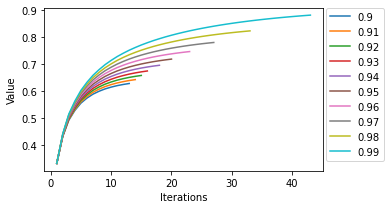

In [37]:
# checking discount with epsilon 0.01 -- max v
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for discount in discount_lst:
    max_v_lst22=[]
    time_lst22 = []
    iter_lst22=[]
    mean_v_lst22=[]
    error_lst22 =[]
    #v0_lst22=[]
    vi = mdptoolbox.mdp.ValueIteration(P2, R2, discount, max_iter=100)
    vi.setSilent()
    stats2=vi.run()
    
    for i in stats2:
        max_v_lst22.append(i['Max V'])
        mean_v_lst22.append(i['Mean V'])
        time_lst22.append(i['Time'])
        iter_lst22.append(i['Iteration'])
        error_lst22.append(i['Error'])
        #v0_lst22.append(i['V[0]'])
    plt.plot(iter_lst22, max_v_lst22, label = discount)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

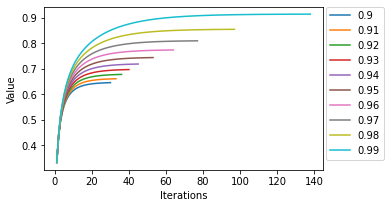

In [38]:
# epsilon had to be reduced for convergence
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for discount in discount_lst:
    max_v_lst22=[]
    time_lst22 = []
    iter_lst22=[]
    mean_v_lst22=[]
    error_lst22 =[]
    #v0_lst22=[]
    vi = mdptoolbox.mdp.ValueIteration(P2, R2, discount, max_iter=100, epsilon =0.001,)
    vi.setSilent()
    stats2=vi.run()
    
    for i in stats2:
        max_v_lst22.append(i['Max V'])
        mean_v_lst22.append(i['Mean V'])
        time_lst22.append(i['Time'])
        iter_lst22.append(i['Iteration'])
        error_lst22.append(i['Error'])
        #v0_lst22.append(i['V[0]'])
    plt.plot(iter_lst22, max_v_lst22, label = discount)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

In [39]:
# checking epsilon
epsilon_lst=[0.001, 0.005, 0.01, 0.05, 0.1]
def find_iter_value (P2, R2, epsilon_lst, discount=0.99,  max_iter=1000):
    iter_lst2=[]
    value_lst2 = []
    time_lst2= []
    mean_value_lst2 = []
    for epsilon in epsilon_lst:
        mdp2 = mdptoolbox.mdp.ValueIteration(P2, R2, discount, epsilon , max_iter)
        mdp2.run()
        value_lst2.append((mdp2.V[0]))
        mean_value_lst2.append(np.mean(mdp2.V[0]))
        iter_lst2.append(mdp2.iter)
        time_lst2.append(mdp2.time)
    return value_lst2, iter_lst2, time_lst2, mean_value_lst2

In [40]:
value_lst2, iter_lst2, time_lst2, mean_value_lst2 = find_iter_value(P2, R2, epsilon_lst, discount=0.99,  max_iter=1000)

In [41]:
df_v_iters2 = pd.DataFrame(list(zip(value_lst2, iter_lst2, time_lst2, epsilon_lst,mean_value_lst2)),
               columns =['Value', 'Iterations', 'Time', 'Epsilon', 'Mean_value'])

In [42]:
df_v_iters2

,Value,Iterations,Time,Epsilon,Mean_value
0,2.861690e-07,138,0.187872,0.001,2.861690e-07
1,3.038664e-16,75,0.117109,0.005,3.038664e-16
2,0.000000e+00,43,0.056449,0.010,0.000000e+00
3,0.000000e+00,6,0.008364,0.050,0.000000e+00
4,0.000000e+00,3,0.004040,0.100,0.000000e+00


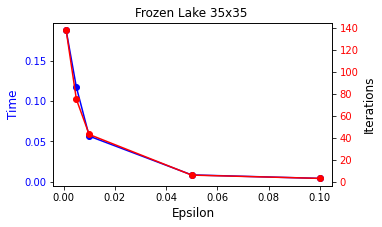

In [43]:
fig,ax1 =plt.subplots(figsize=(5,3))
ax1.set_xlabel('Epsilon', fontsize=12)
ax1.set_ylabel('Time', color='b',fontsize=12)
ax1.plot(epsilon_lst, time_lst2, 'o-',color='b', label='fitness')
ax1.tick_params(axis='y', labelcolor='b')


ax2=ax1.twinx()
ax2.set_ylabel('Iterations',fontsize=12)
ax2.plot(epsilon_lst,iter_lst2 , 'o-', color='r',label='time' )
ax2.tick_params(axis='y', labelcolor='r')
plt.title('Frozen Lake 35x35 ')
plt.show()

In [45]:
#big problem VI
mdp2_35 = mdptoolbox.mdp.ValueIteration(P2, R2, 0.99, epsilon=0.001, max_iter=1000 )
mdp2_35.setVerbose()
stats2_35=mdp2_35.run()

 Iteration   Variation
         1    0.333333
         2    0.110000
         3    0.072600
         4    0.071874
         5    0.055343
         6    0.048267
         7    0.043910
         8    0.038783
         9    0.036426
        10    0.034190
        11    0.030555
        12    0.029768
        13    0.028320
        14    0.026613
        15    0.025868
        16    0.024438
        17    0.023466
        18    0.022873
        19    0.021657
        20    0.021215
        21    0.020402
        22    0.019738
        23    0.019235
        24    0.018397
        25    0.017957
        26    0.017168
        27    0.016635
        28    0.016058
        29    0.015332
        30    0.014934
        31    0.014180
        32    0.013831
        33    0.013315
        34    0.012772
        35    0.012452
        36    0.011770
        37    0.011609
        38    0.011177
        39    0.010857
        40    0.010574
        41    0.010303
        42    0.010061
        43 

In [46]:
max_v_lst22=[]
time_lst22 = []
iter_lst22=[]
mean_v_lst22=[]
error_lst22 =[]
for i in stats2_35:
    max_v_lst22.append(i['Max V'])
    mean_v_lst22.append(i['Mean V'])
    time_lst22.append(i['Time'])
    iter_lst22.append(i['Iteration'])
    error_lst22.append(i['Error'])
    
#print(max_v_lst, time_lst, iter_lst)

Text(0, 0.5, 'Max Value')

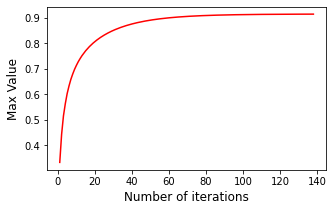

In [47]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst22, max_v_lst22,  color='r')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
#plt.legend(loc='lower right',fontsize=10)

Text(0, 0.5, 'Mean Value')

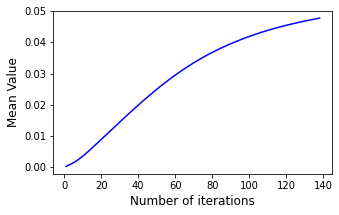

In [48]:
plt.figure(figsize=(5,3))
#plt.plot(iter_lst22, max_v_lst22,  color='r', label = 'Max Value')
plt.plot(iter_lst22, mean_v_lst22,  color='b')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Mean Value',fontsize=12)
#plt.legend(loc='lower right',fontsize=10)

Text(0, 0.5, 'Error')

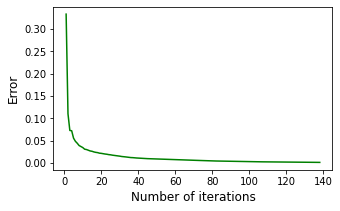

In [49]:
plt.figure(figsize=(5,3))
#plt.plot(iter_lst22, max_v_lst22,  color='r', label = 'Max Value')
plt.plot(iter_lst22, error_lst22,  color='g')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Error',fontsize=12)
#plt.legend(loc='lower right',fontsize=10)

In [50]:
arrows = ['\u2190', '\u2193', '\u2192', '\u2191']
for i in range(35):
    for j in range(35):
        print(arrows[mdp2_35.policy[i*35+j]], end=' ')
    print()
    
print()
prob2.env.render()
print()
for i in range(35):
    for j in range(35):
        print(mdp2_35.policy[i*35+j], end=' ')
    print()
    


↓ → ↑ → → → → ← ← → ← ↑ ↑ ↑ → ↑ ↑ → → → → → ← ↑ ← ↑ ↑ ↑ ↑ → → → → ← ← 
↓ ← ← → → → ↓ ↓ ↓ ↓ ← ← ← → → ← ← → ↓ ↑ → ↓ ← ← ← ← ← ← ← → → ↓ ↓ ↓ ↓ 
↓ ↓ ↓ ↑ → → ↓ ↓ ↓ ↓ ↓ ↓ ← ← → ← ← → ← ← → ↑ ↓ ↓ ↓ ← ← ↓ ↓ → → ↓ ↓ ↓ ↓ 
↓ → ← ← → ↑ → ↓ ↓ ↓ ↑ ↑ ↓ ↓ ← ← ↓ ↑ → ↓ ← ← → ↓ ← ← ← ← → ↑ → ↓ ↑ ↑ → 
↓ → ↓ ↓ ← ← → ↓ ← ← ← ← → ← ← ↓ ← ← → ↓ ↑ ↓ ↓ ← ↑ ↑ ← ← ← ← → ← ← ← → 
↑ ↑ ↑ ← ← ↓ ↓ ↓ ← ← ← ↓ ← ← ← ← ← ↓ → ← ← → ← ← ← → ↑ ↓ ↓ ↓ → ← ← ↓ ↓ 
← ← ← → ↓ ↓ ↓ ← ← ← ↓ ↓ ← ← ← → ← ← → → ← ← ← ← ← ← → ↑ ↑ ↑ ↑ → ↓ ↓ ↓ 
← ← ↓ → → ↑ → ← ← ↓ ↑ → ↓ ↓ ↓ ← ↑ ← ← → ↑ ↓ ↓ ↓ ↓ ← ← ← ← ← ← → ↓ ↓ ↓ 
↓ ↓ ↓ → ← ← → ↓ ← ← ← → ↓ ↑ ↓ ← ← ← ↓ ← ← → → ↓ ↓ ↓ ↓ ↓ ↓ ← ← → ↓ ↓ ↓ 
↓ ↓ → → ↑ ↓ → → ↓ ↓ ↓ ↓ ← ← → ↑ ↓ ↓ ↑ ↓ ↓ → → ↑ → ↓ ↓ ← ← → ↓ ↓ ↓ ↓ ↓ 
↓ ↑ ↑ ← ← ← → → → ↓ ↓ ↓ ↓ ↓ ← ← → ← ← → ↑ ↑ ← ← → ↑ ↓ ← ← ← → ↓ ↑ ↑ ↓ 
← ← ← → ↓ ← ← → → → ↓ ← ← ← → ↓ → ↓ ↓ ← ← ← → ↓ ← ← → ↑ ← ← → ← ← ← → 
↓ ↓ ↓ ↓ ↓ ← ← → ↑ → → ← ← ← ← ← → ↑ ↑ ← ← ↓ → ↑ ↑ ↓ ← ← → ↓ ↑ ← ↓ ↓ ↓ 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ← ← → → ← ← ↓ ↓ ↓ ← ← ← ← ← → ↑ ← ← → ← ↓ ← ← ← ← ← → ↓ 
↓ ↓ ↓ 

Text(0.5, 1.0, 'Comparison of problem sizes')

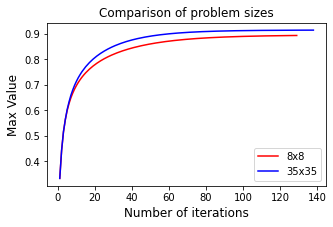

In [51]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst33, max_v_lst33,  color='r', label= '8x8')
plt.plot(iter_lst22, max_v_lst22,  color='b', label= '35x35')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
plt.legend(loc='lower right',fontsize=10)
plt.title('Comparison of problem sizes')

Text(0.5, 1.0, 'Comparison of problem sizes')

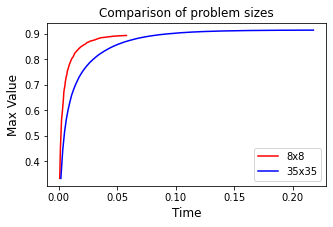

In [52]:
plt.figure(figsize=(5,3))
plt.plot(time_lst33, max_v_lst33,  color='r', label= '8x8')
plt.plot(time_lst22, max_v_lst22,  color='b', label= '35x35')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
plt.legend(loc='lower right',fontsize=10)
plt.title('Comparison of problem sizes')

Text(0.5, 1.0, 'Comparison of problem sizes')

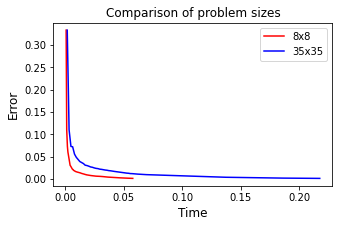

In [53]:
plt.figure(figsize=(5,3))
plt.plot(time_lst33, error_lst33,  color='r', label= '8x8')
plt.plot(time_lst22, error_lst22,  color='b', label= '35x35')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.legend(loc='upper right',fontsize=10)
plt.title('Comparison of problem sizes')

Text(0.5, 1.0, 'Comparison of problem sizes')

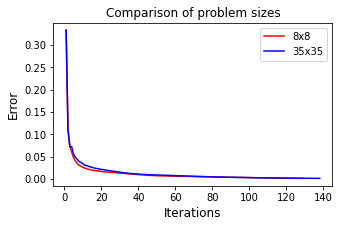

In [54]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst33, error_lst33,  color='r', label= '8x8')
plt.plot(iter_lst22, error_lst22,  color='b', label= '35x35')
plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.legend(loc='upper right',fontsize=10)
plt.title('Comparison of problem sizes')

Text(0.5, 1.0, 'Comparison of problem sizes')

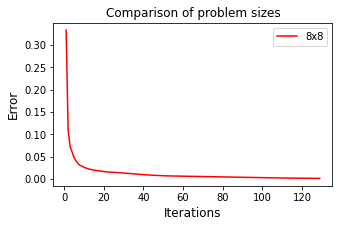

In [278]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst33, error_lst33,  color='r', label= '8x8')
#plt.plot(iter_lst22, error_lst22,  color='b', label= '35x35')
plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.legend(loc='upper right',fontsize=10)
plt.title('Comparison of problem sizes')

Text(0.5, 1.0, 'Comparison of problem sizes')

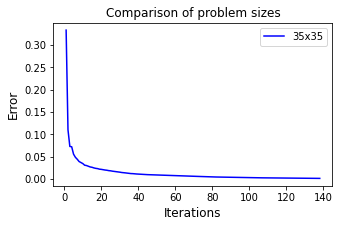

In [279]:
plt.figure(figsize=(5,3))
#plt.plot(iter_lst33, error_lst33,  color='r', label= '8x8')
plt.plot(iter_lst22, error_lst22,  color='b', label= '35x35')
plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.legend(loc='upper right',fontsize=10)
plt.title('Comparison of problem sizes')

In [57]:
# Policy iteration

In [58]:
# Frozen Lake 8x8

Text(0, 0.5, 'Value')

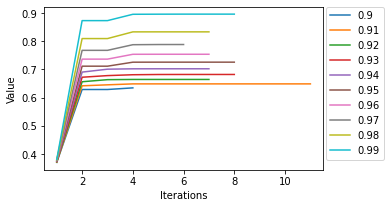

In [58]:
# discount with max V
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for discount in discount_lst:
    max_v_lst44=[]
    time_lst44 = []
    iter_lst44=[]
    mean_v_lst44=[]
    error_lst44 =[]
    pi = mdptoolbox.mdp.PolicyIteration(P, R, discount, max_iter=100)
    pi.setSilent()
    stats3=pi.run()
    
    for i in stats3:
        max_v_lst44.append(i['Max V'])
        mean_v_lst44.append(i['Mean V'])
        time_lst44.append(i['Time'])
        iter_lst44.append(i['Iteration'])
        error_lst44.append(i['Error'])
    plt.plot(iter_lst44, max_v_lst44, label = discount)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

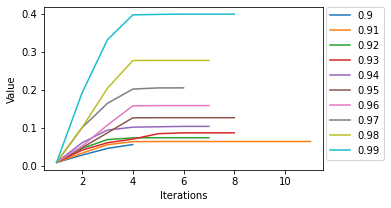

In [59]:
# discount with mean V
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for discount in discount_lst:
    max_v_lst44=[]
    time_lst44 = []
    iter_lst44=[]
    mean_v_lst44=[]
    error_lst44 =[]
    v0_lst44=[]
    pi = mdptoolbox.mdp.PolicyIteration(P, R, discount, max_iter=100)
    pi.setSilent()
    stats3=pi.run()
    
    for i in stats3:
        max_v_lst44.append(i['Max V'])
        mean_v_lst44.append(i['Mean V'])
        time_lst44.append(i['Time'])
        iter_lst44.append(i['Iteration'])
        error_lst44.append(i['Error'])
        v0_lst44.append(i['V[0]'])
    plt.plot(iter_lst44, mean_v_lst44, label = discount)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

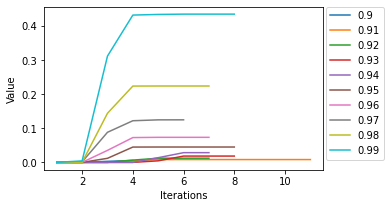

In [60]:
# discount with V[0]
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for discount in discount_lst:
    max_v_lst44=[]
    time_lst44 = []
    iter_lst44=[]
    mean_v_lst44=[]
    error_lst44 =[]
    v0_lst44=[]
    pi = mdptoolbox.mdp.PolicyIteration(P, R, discount, max_iter=100)
    pi.setSilent()
    stats3=pi.run()
    
    for i in stats3:
        max_v_lst44.append(i['Max V'])
        mean_v_lst44.append(i['Mean V'])
        time_lst44.append(i['Time'])
        iter_lst44.append(i['Iteration'])
        error_lst44.append(i['Error'])
        v0_lst44.append(i['V[0]'])
    plt.plot(iter_lst44, v0_lst44, label = discount)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('Value')

In [62]:
# small prob PI
pi1_8 = mdptoolbox.mdp.PolicyIteration(P, R, 0.99, max_iter=10)
pi1_8.setVerbose()
stats2_8=pi1_8.run()

 Iteration   Variation
         1(array([ 0,  1,  4,  6,  7,  8, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22,
       23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41,
       42, 43, 44, 45, 46, 47, 50, 55, 58, 59, 60]),)
         2(array([ 0,  1,  4,  6,  8, 10, 13, 14, 17, 18, 19, 20, 22, 26, 27, 28, 29,
       30, 32, 35, 36, 38, 41]),)
         3(array([15, 18, 21, 22, 23, 26, 27, 30, 31, 32, 39, 41, 53]),)
         4(array([ 4,  8, 17, 21, 22, 30, 50]),)
         5(array([ 4,  8, 17, 22, 32, 41]),)
         6(array([ 4,  8, 17, 32, 53]),)
         7(array([ 4,  8, 17, 53]),)
         8(array([ 4,  8, 17, 53]),)
Iterating stopped, unchanging policy found.


In [306]:
arrows = ['\u2190', '\u2193', '\u2192', '\u2191']
for i in range(8):
    for j in range(8):
        print(arrows[pi1_8.policy[i*8+j]], end=' ')
    print()
    
print()
problem.env.render()
print()
for i in range(8):
    for j in range(8):
        print(pi1_8.policy[i*8+j], end=' ')
    print()
    

↑ ↑ ← ← ← ← → → 
← ← → ↓ ↓ ↓ → ↓ 
← ↓ → → → → ↓ ↓ 
← → → → → → → ↓ 
↓ → → → → → → ↓ 
← → ↑ ↑ ↑ ↑ ↑ → 
← ← ← ← ← → ← → 
← ← → ↓ ↓ ← ← ← 


SFFHFHFF
FHFFFFFF
HFFFFFFF
HFFFFFFF
FFFFFFFF
HFFFFFFF
HHFHHFHF
HHFFFFHG

3 3 0 0 0 0 2 2 
0 0 2 1 1 1 2 1 
0 1 2 2 2 2 1 1 
0 2 2 2 2 2 2 1 
1 2 2 2 2 2 2 1 
0 2 3 3 3 3 3 2 
0 0 0 0 0 2 0 2 
0 0 2 1 1 0 0 0 


In [63]:
stats2_8

[{'State': None,
  'Action': None,
  'Reward': 0.3806780860126649,
  'Error': 0.12562376838417938,
  'Time': 0.002057790756225586,
  'V[0]': 0.0,
  'Max V': 0.3806780860126649,
  'Mean V': 0.009545476330384025,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 0.8731323440877317,
  'Error': 0.1075691574437021,
  'Time': 0.005792856216430664,
  'V[0]': 0.004382040601407688,
  'Max V': 0.8731323440877317,
  'Mean V': 0.19219204553001376,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 0.8731323440877317,
  'Error': 0.05241666058392541,
  'Time': 0.00757288932800293,
  'V[0]': 0.311752435901786,
  'Max V': 0.8731323440877317,
  'Mean V': 0.3318998900935973,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 0.8956106964194354,
  'Error': 0.001257124535808063,
  'Time': 0.009457826614379883,
  'V[0]': 0.4320623731169196,
  'Max V': 0.8956106964194354,
  'Mean V': 0.3974157190462455,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Re

In [64]:
max_v_lst45=[]
time_lst45 = []
iter_lst45=[]
mean_v_lst45=[]
error_lst45 =[]
v0_lst45=[]
for i in stats2_8:
    max_v_lst45.append(i['Max V'])
    mean_v_lst45.append(i['Mean V'])
    time_lst45.append(i['Time'])
    iter_lst45.append(i['Iteration'])
    error_lst45.append(i['Error'])
    v0_lst45.append(i['V[0]'])
#print(max_v_lst, time_lst, iter_lst)

Text(0, 0.5, 'Max Value')

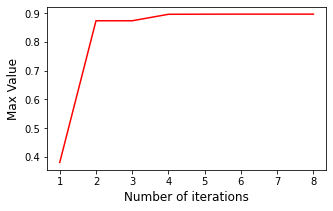

In [65]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst45, max_v_lst45,  color='r')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
#plt.legend(loc='lower right',fontsize=10)

Text(0, 0.5, 'Mean Value')

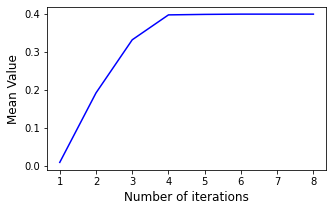

In [66]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst45, mean_v_lst45,  color='b')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Mean Value',fontsize=12)
#plt.legend(loc='lower right',fontsize=10)

Text(0, 0.5, 'Error')

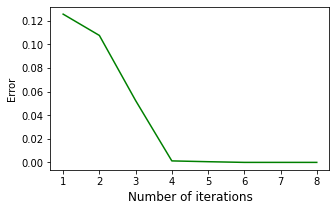

In [67]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst45, error_lst45,  color='g')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Error',fontsize=10)

In [68]:
# frozen lake 35x35 policy iteration

Text(0, 0.5, 'value')

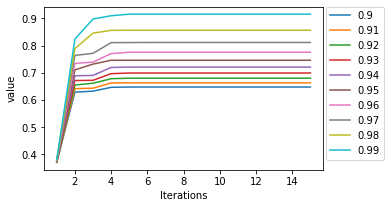

In [72]:
# discount with max V
plt.rcParams["figure.figsize"] = (5,3)

discount_lst = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]

for discount in discount_lst:
    max_v_lst44=[]
    time_lst44 = []
    iter_lst44=[]
    mean_v_lst44=[]
    error_lst44 =[]
    v0_lst44=[]
    pi = mdptoolbox.mdp.PolicyIteration(P2, R2, discount, max_iter=15)
    pi.setSilent()
    stats5=pi.run()
    
    for i in stats5:
        max_v_lst44.append(i['Max V'])
        mean_v_lst44.append(i['Mean V'])
        time_lst44.append(i['Time'])
        iter_lst44.append(i['Iteration'])
        error_lst44.append(i['Error'])
        v0_lst44.append(i['V[0]'])
    plt.plot(iter_lst44, max_v_lst44, label = discount)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('value')

In [73]:
pi2 = mdptoolbox.mdp.PolicyIteration(P2, R2, 0.99, max_iter=30)
pi2.setVerbose()
pi2.run()

 Iteration   Variation
         1(array([   1,    2,    4,    7,    9,   10,   11,   12,   14,   15,   16,
         20,   21,   22,   23,   24,   25,   26,   28,   32,   33,   35,
         36,   39,   42,   43,   44,   49,   50,   53,   55,   56,   57,
         64,   67,   68,   69,   70,   71,   72,   74,   77,   78,   79,
         82,   84,   88,   90,   91,   92,   93,   94,   98,  102,  103,
        104,  105,  106,  109,  112,  113,  114,  117,  118,  119,  121,
        124,  125,  127,  128,  129,  130,  131,  133,  135,  137,  138,
        139,  141,  143,  144,  147,  148,  149,  152,  153,  155,  156,
        159,  160,  161,  162,  164,  165,  168,  170,  172,  174,  176,
        178,  182,  183,  187,  188,  194,  196,  197,  200,  202,  203,
        205,  208,  209,  213,  214,  217,  218,  220,  222,  225,  229,
        230,  232,  234,  237,  238,  240,  242,  243,  244,  245,  247,
        248,  249,  251,  252,  254,  255,  257,  258,  259,  260,  264,
        265,  266

         4(array([   0,    1,    2,    3,    4,    5,    7,   10,   13,   15,   19,
         21,   24,   35,   36,   38,   39,   40,   41,   42,   43,   56,
         59,   68,   70,   71,   72,   73,   74,   76,   77,   80,   84,
         92,   95,   97,  101,  102,  104,  105,  106,  107,  110,  111,
        112,  115,  117,  118,  123,  128,  131,  136,  140,  141,  142,
        143,  146,  147,  148,  156,  159,  162,  168,  172,  175,  176,
        177,  178,  180,  183,  184,  187,  188,  190,  192,  193,  196,
        197,  203,  208,  213,  214,  215,  216,  217,  218,  220,  222,
        226,  232,  236,  241,  245,  247,  248,  249,  250,  251,  252,
        254,  255,  262,  277,  280,  281,  282,  283,  284,  286,  287,
        288,  292,  298,  302,  303,  305,  308,  312,  313,  318,  319,
        320,  321,  322,  323,  325,  334,  336,  337,  339,  340,  341,
        344,  347,  348,  349,  350,  352,  356,  357,  358,  359,  361,
        362,  370,  376,  377,  378,  38

        12(array([  85,   95,   97,  119,  121,  131,  155,  168,  184,  190,  192,
        196,  198,  200,  218,  220,  228,  230,  232,  234,  247,  254,
        262,  270,  288,  309,  320,  344,  356,  363,  378,  390,  474,
        476,  478,  483,  500,  510,  512,  514,  517,  519,  534,  546,
        548,  570,  582,  586,  588,  593,  608,  620,  622,  624,  656,
        658,  666,  702,  718,  729,  754,  765,  787,  801,  820,  835,
        837,  856,  860,  871,  873,  876,  896,  929,  930,  942,  950,
        957,  959,  961,  964,  966,  967,  978,  986,  995,  998, 1000,
       1017, 1032, 1051, 1076]),)
        13(array([  59,   85,   97,  121,  150,  156,  168,  184,  186,  188,  190,
        192,  218,  220,  226,  234,  247,  254,  262,  270,  288,  298,
        344,  363,  378,  432,  434,  452,  464,  468,  476,  478,  486,
        498,  500,  510,  512,  514,  517,  522,  534,  546,  588,  608,
        620,  624,  629,  656,  658,  666,  676,  702,  710,  720,  

        28(array([  59,   82,   85,   97,  119,  121,  150,  155,  156,  168,  184,
        186,  188,  192,  196,  198,  220,  226,  230,  232,  234,  236,
        262,  288,  320,  356,  390,  432,  434,  449,  464,  468,  486,
        498,  500,  507,  517,  534,  588,  593,  620,  656,  676,  702,
        710,  717,  718,  729,  747,  754,  765,  807,  837,  854,  860,
        873,  876,  878,  896,  912,  921,  928,  929,  930,  942,  950,
        957,  959,  961,  964,  966, 1000, 1017, 1032, 1068, 1076, 1136,
       1200]),)
        29(array([  48,   85,  121,  156,  168,  188,  192,  196,  198,  200,  226,
        230,  232,  234,  236,  245,  247,  270,  288,  320,  363,  405,
        432,  434,  441,  452,  464,  468,  476,  478,  483,  486,  498,
        507,  510,  512,  514,  519,  534,  546,  548,  570,  582,  588,
        593,  608,  622,  624,  658,  666,  702,  718,  729,  747,  754,
        770,  807,  818,  829,  835,  839,  840,  843,  852,  854,  863,
        871, 

[{'State': None,
  'Action': None,
  'Reward': 0.38067439432813516,
  'Error': 0.12562255012828466,
  'Time': 0.06315183639526367,
  'V[0]': 1.828527328434164e-112,
  'Max V': 0.38067439432813516,
  'Mean V': 0.0004967379864181338,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 0.8235414764346406,
  'Error': 0.1267996265929176,
  'Time': 0.13219594955444336,
  'V[0]': 4.0415596360736406e-41,
  'Max V': 0.8235414764346406,
  'Mean V': 0.004996247600413304,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 0.8977947850332166,
  'Error': 0.11944741855569577,
  'Time': 0.19813203811645508,
  'V[0]': -5.2063373792611316e-30,
  'Max V': 0.8977947850332166,
  'Mean V': 0.01462424953828351,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 0.9096513977434216,
  'Error': 0.02945861025487681,
  'Time': 0.2587599754333496,
  'V[0]': -3.890595816505517e-20,
  'Max V': 0.9096513977434216,
  'Mean V': 0.039712952524949496,
  'Iteration': 4},
 {'Stat

In [128]:
# at iteration 18, error had reached minimum

In [74]:
pi2 = mdptoolbox.mdp.PolicyIteration(P2, R2, 0.99, max_iter=18)
pi2.setSilent()
stats6 = pi2.run()

In [75]:
arrows = ['\u2190', '\u2193', '\u2192', '\u2191']
for i in range(35):
    for j in range(35):
        print(arrows[pi2.policy[i*35+j]], end=' ')
    print()
    
print()
prob2.env.render()
print()
for i in range(35):
    for j in range(35):
        print(pi2.policy[i*35+j], end=' ')
    print()
    

↑ ↑ ↑ → → → → ← ← → ← ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → ← ← 
↑ ← ← → → → → ↓ ↓ ← ← ← ← ↑ ↑ ← ← → ← ↑ ← ← ← ← ← ← ← ← ← → → → ↓ ↓ ↓ 
↑ ↑ ↓ ↑ ↑ → → ↓ ← ← ← ↓ ← ← → ← ← → ← ← → ↑ ← ↓ ← ← ← ↑ ↓ → → ↓ ↓ ↓ ↓ 
↑ → ← ← → ↑ → ↓ ← ← ↑ ↑ ↓ ↓ ↑ ← → ↑ → ↓ ← ← → ← ← ← ← ← → ↑ → ↓ ↑ ↑ → 
↑ → ← ↓ ↑ ← → ← ← ← ← ← → ← ← → ↑ ← → ← ↑ ↓ ← ← ↑ ↑ ← ← ← ← → ← ← ← → 
↑ ↑ ↑ ← ← → → ← ← ↑ ← ↓ ← ↑ ← ← ← → → ← ← → ← ← ← → ↑ ↓ ↓ ↓ → ← ← ↓ → 
← ← ← → ↓ ↓ ↓ ← ← ← → ↓ ← ← ← → ↓ ← → → ↓ ← ← ← ↓ ← ↑ ↑ ↑ ↑ ↑ → ↓ ↓ ↓ 
← ← ↓ → ↓ ↑ → ← ← ↓ ↑ → ↓ ↓ ↓ ← ↑ ↑ ← → ↑ ↓ ↓ ↓ ↓ ← ← ← ← ← ← → ↓ ↓ ↓ 
↓ ↓ ↓ ↓ ← ← → ← ← ← ← → ↓ ↑ ↓ ← ← ← → ← ← → ↓ ↓ ↓ ↓ ↓ ↓ ↑ ← ← → ↓ ↓ ↓ 
↓ ↓ ↓ ← ↑ ↓ → → ↓ ↓ ↓ ↓ ← ← → ↑ ↓ ↓ ↑ ↓ ↓ ↓ → ↑ → ↓ ↓ ← ← → ↓ → ↓ ↓ ↓ 
← ↑ ↑ ← ← ← ↑ → → ↓ ↓ ← ← ↑ ← ← → ← ← → ↑ ↑ ← ← → ↑ ↓ ← ↓ ← → ↓ ↑ ↑ ↓ 
← ← ← → ↓ ← ← → → → ↓ ← ← ← → ↓ → ↓ ↓ ← ← ← → ↓ ← ← → ↑ ← ← → ← ← ← → 
↓ ↓ ↓ ↓ ↓ ← ← → ↑ ↑ → ← ↑ ← ← ← → ↑ ↑ ← ← ↓ → ↑ ↑ ↓ ← ← → ↑ ↑ ← ↓ ↓ → 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ← ← → → ← ← → ↓ ↓ ← ← ← ← ← → ↑ ← ← → ← ↓ ← ← ← → ← → → 
↓ ↓ ↓ 

In [76]:
pi2b = mdptoolbox.mdp.PolicyIteration(P2, R2, 0.99, max_iter=17)
pi2b.setSilent()
stats6b = pi2b.run()

In [77]:
arrows = ['\u2190', '\u2193', '\u2192', '\u2191']
for i in range(35):
    for j in range(35):
        print(arrows[pi2b.policy[i*35+j]], end=' ')
    print()
    
print()
prob2.env.render()
print()
for i in range(35):
    for j in range(35):
        print(pi2b.policy[i*35+j], end=' ')
    print()
    

↑ ↑ ↑ → → → → ← ← → ← ↑ ↑ ↑ ↑ ↑ ↑ ↑ ← ← ← ← ← ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → → ← ← 
↑ ← ← → → → → ↓ ↓ ← ← ← ← → ↑ ← ← → ← ↑ ← ← ← ← ← ← ← ← ← → → → ↓ ↓ ↓ 
↑ ↑ ↓ ↑ ↑ → → ↓ ← ← ← ↓ ← ← → ↑ ← → ← ← → ↑ ← ↓ ← ↓ ← ↓ ↓ → → ↓ ↓ ↓ ↓ 
↑ → ← ← → ↑ → ↓ ← ← ↑ ↑ ↓ ↓ ← ← → ↑ → ↓ ← ← → ← ← ← ← ← → ↑ → ↓ ↑ ↑ → 
↑ → ← ↓ ↑ ← → ← ← ← ← ← → ← ← ↓ ↑ ← → ← ↑ ↓ ← ← ↑ ↑ ← ← ← ← → ← ← ← → 
↑ ↑ ↑ ← ← → → ← ← ↑ ← ↓ ← ↑ ← ← ← ↑ → ← ← → ← ↑ ← ↑ ↑ ↓ ↓ ↓ → ← ← ↓ → 
← ← ← → ↓ ↓ ↓ ← ← ← → ↓ ← ← ← → ← ← → → ↓ ← ← ← ← ← → ↑ ↑ ↑ ↑ → ↓ ↓ ↓ 
← ← ↓ → ↓ ↑ → ← ← ↓ ↑ → ↓ ↓ ↓ ← ↑ ↓ ← → ↑ ↓ ↓ ↓ ↓ ← ← ← ← ← ← → ↓ ↓ ↓ 
↓ ↓ ↓ ↓ ← ← → ← ← ← ← → ↓ ↑ ↓ ← ← ← ↓ ← ← → ↓ ↓ ↓ ↓ ↓ ↓ ↑ ↓ ← → ↓ ↓ ↓ 
↓ ↓ ↓ ← ↑ ↑ → → ↓ ↓ ↓ ↓ ← ← → ↑ ↓ ↓ ↑ ↓ ↓ ↓ → ↑ → ↓ ↓ ← ← ↑ ↓ → ↓ ↓ ↓ 
← ↑ ↑ ← ← ← → → → ↓ ↓ ← ← ↓ ← ← → ← ← → ↑ ↑ ← ← → ↑ ↓ ← ← ← → ↓ ↑ ↑ ↓ 
← ← ← → ↓ ↓ ← → → → ↓ ← ← ← → ↓ → ↓ ↓ ← ↑ ← → ↓ ← ← → ↑ ← ← → ← ← ← → 
↓ ↓ ↓ ↓ ↓ ← ← → ↑ ↑ → ← ← ← → ← → ↑ ↑ ← ← → → ↑ ↑ ↓ ← ← → ↑ ↑ ← ↓ ↓ → 
↓ ↓ ↓ ↓ ↓ ↓ ↓ ← ← → → ← ← ↓ ↓ ↓ ← ← ← → ← ↑ ↑ ↑ ← → ← ↓ ← ← ← ← ← → → 
↓ ↓ ↓ 

In [ ]:
# check position 1212 on both the grids

In [80]:
max_v_lst46=[]
time_lst46 = []
iter_lst46=[]
mean_v_lst46=[]
error_lst46 =[]
v0_lst46=[]
for i in stats6:
    max_v_lst46.append(i['Max V'])
    mean_v_lst46.append(i['Mean V'])
    time_lst46.append(i['Time'])
    iter_lst46.append(i['Iteration'])
    error_lst46.append(i['Error'])
    v0_lst46.append(i['V[0]'])
#print(max_v_lst, time_lst, iter_lst)

Text(0, 0.5, 'Max Value')

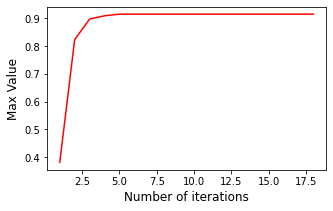

In [81]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst46, max_v_lst46,  color='r')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)

Text(0, 0.5, 'Mean Value')

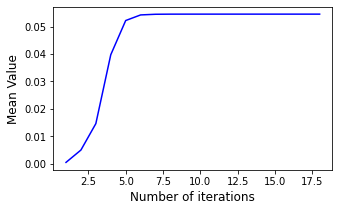

In [82]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst46, mean_v_lst46,  color='b')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Mean Value',fontsize=12)
#plt.legend(loc='lower right',fontsize=10)

Text(0, 0.5, 'Error')

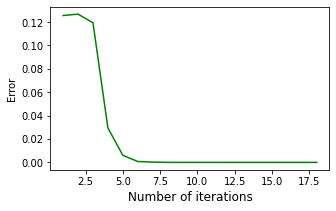

In [83]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst46, error_lst46,  color='g')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Error',fontsize=10)

Text(0.5, 1.0, 'Comparison of problem sizes')

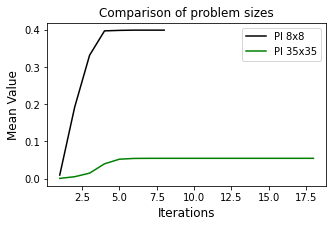

In [84]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst45, mean_v_lst45,  color='k', label='PI 8x8')
plt.plot(iter_lst46, mean_v_lst46,  color='g', label='PI 35x35')

plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Mean Value',fontsize=12)
plt.legend(loc='upper right',fontsize=10)
plt.title('Comparison of problem sizes')

Text(0.5, 1.0, 'Comparison of problem sizes')

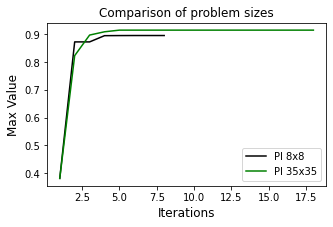

In [85]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst45, max_v_lst45,  color='k', label='PI 8x8')
plt.plot(iter_lst46, max_v_lst46,  color='g', label='PI 35x35')

plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
plt.legend(loc='lower right',fontsize=10)
plt.title('Comparison of problem sizes')

Text(0.5, 1.0, 'Comparison of problem sizes')

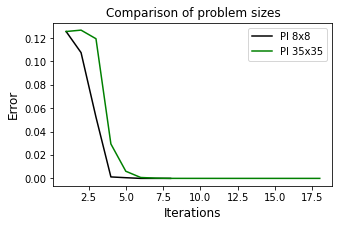

In [86]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst45, error_lst45,  color='k', label='PI 8x8')
plt.plot(iter_lst46, error_lst46,  color='g', label='PI 35x35')

plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.legend(loc='upper right',fontsize=10)
plt.title('Comparison of problem sizes')

Text(0.5, 1.0, 'Comparison of problem sizes and VI-PI')

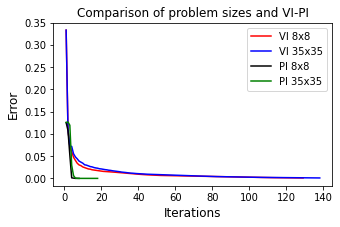

In [87]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst33, error_lst33,  color='r', label= 'VI 8x8')
plt.plot(iter_lst22, error_lst22,  color='b', label= 'VI 35x35')
plt.plot(iter_lst45, error_lst45,  color='k', label='PI 8x8')
plt.plot(iter_lst46, error_lst46,  color='g', label='PI 35x35')
plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.legend(loc='upper right',fontsize=10)
plt.title('Comparison of problem sizes and VI-PI')

Text(0.5, 1.0, 'Comparison of problem sizes and VI-PI')

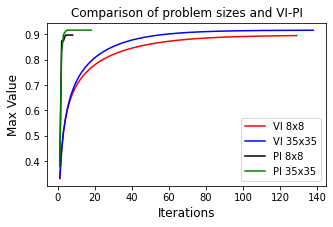

In [88]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst33, max_v_lst33,  color='r', label= 'VI 8x8')
plt.plot(iter_lst22, max_v_lst22,  color='b', label= 'VI 35x35')
plt.plot(iter_lst45, max_v_lst45,  color='k', label='PI 8x8')
plt.plot(iter_lst46, max_v_lst46,  color='g', label='PI 35x35')
plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
plt.legend(loc='lower right',fontsize=10)
plt.title('Comparison of problem sizes and VI-PI')

Text(0.5, 1.0, 'Comparison of problem sizes and VI-PI')

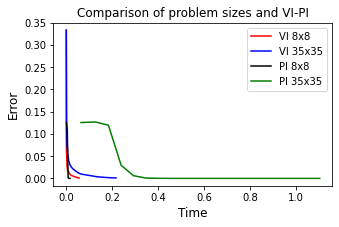

In [89]:
plt.figure(figsize=(5,3))
plt.plot(time_lst33, error_lst33,  color='r', label= 'VI 8x8')
plt.plot(time_lst22, error_lst22,  color='b', label= 'VI 35x35')
plt.plot(time_lst45, error_lst45,  color='k', label='PI 8x8')
plt.plot(time_lst46, error_lst46,  color='g', label='PI 35x35')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Error',fontsize=12)
plt.legend(loc='upper right',fontsize=10)
plt.title('Comparison of problem sizes and VI-PI')

In [ ]:
# Q learning

In [ ]:
# 8x8 frozen lake

Text(0, 0.5, 'value')

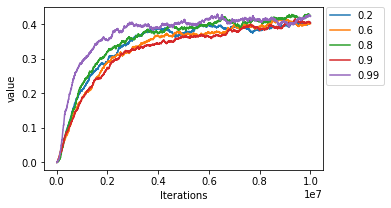

In [93]:
# hyperparameter tuning for alpha/learning rate
plt.rcParams["figure.figsize"] = (5,3)

alpha_lst = [0.2,  0.6, 0.8, 0.9, 0.99]

for alpha in alpha_lst:
    alpha_lst50=[]
    iter_lst50=[]
    max_v_lst50=[]
    mean_v_lst50=[]
    error_lst50 =[]
    v0_lst50=[]
    pi_q5 = mdptoolbox.mdp.QLearning(P, R, gamma=0.99, alpha=alpha, alpha_min=0.001, alpha_decay=0.99, n_iter=10000000)
    stats11=pi_q5.run()
    
    for i in stats11:
        max_v_lst50.append(i['Max V'])
        mean_v_lst50.append(i['Mean V'])
        #time_lst46.append(i['Time'])
        iter_lst50.append(i['Iteration'])
        error_lst50.append(i['Error'])
        v0_lst50.append(i['V[0]'])
        alpha_lst50.append(i['Alpha'])
    plt.plot(iter_lst50, max_v_lst50, label = alpha)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('value')

Text(0, 0.5, 'value')

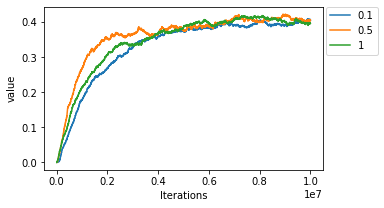

In [94]:
# hyperparameter tuning for exploration/epsilon rate
plt.rcParams["figure.figsize"] = (5,3)

epsilon_lst = [0.1,  0.5, 1]

for epsilon in epsilon_lst:
    alpha_lst49=[]
    iter_lst49=[]
    max_v_lst49=[]
    mean_v_lst49=[]
    error_lst49 =[]
    v0_lst49=[]
    pi_q5 = mdptoolbox.mdp.QLearning(P, R, gamma=0.99, alpha=0.99, alpha_min=0.001, alpha_decay=0.99, n_iter=10000000, epsilon =epsilon, epsilon_min=0.1, epsilon_decay=0.99)
    stats10=pi_q5.run()
    
    for i in stats10:
        max_v_lst49.append(i['Max V'])
        mean_v_lst49.append(i['Mean V'])
        iter_lst49.append(i['Iteration'])
        error_lst49.append(i['Error'])
        v0_lst49.append(i['V[0]'])
        alpha_lst49.append(i['Alpha'])
    plt.plot(iter_lst49, max_v_lst49, label = epsilon)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('value')

In [102]:
# small prob Q learning
pi_q6 = mdptoolbox.mdp.QLearning(P, R, gamma=0.99, alpha=0.99, alpha_min=0.001, alpha_decay=0.99, n_iter=10000000, epsilon =1, epsilon_min=0.1, epsilon_decay=0.99)
stats11=pi_q6.run()

In [309]:
#stats11

In [108]:
alpha_lst50=[]
iter_lst50=[]
max_v_lst50=[]
mean_v_lst50=[]
error_lst50 =[]
v0_lst50=[]
epsilon_lst50=[]
time_lst50=[]
reward_lst50=[]
state_lst50=[]
for i in stats11:
    alpha_lst50.append(i['Alpha'])
    iter_lst50.append(i['Iteration'])
    max_v_lst50.append(i['Max V'])
    mean_v_lst50.append(i['Mean V'])
    error_lst50.append(i['Error'])
    v0_lst50.append(i['V[0]'])
    epsilon_lst50.append(i['Epsilon'])
    time_lst50.append(i['Time'])
    reward_lst50.append(i['Reward'])
    state_lst50.append(i['State'])

Text(0, 0.5, 'Max Value')

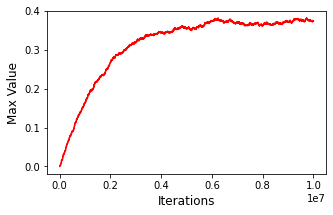

In [109]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst50, max_v_lst50,  color='r')
plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)

Text(0, 0.5, 'Mean Value')

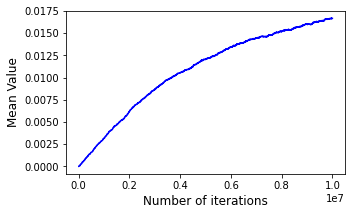

In [111]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst50, mean_v_lst50,  color='b')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Mean Value',fontsize=12)
#plt.legend(loc='lower right',fontsize=10)

Text(0, 0.5, 'Error')

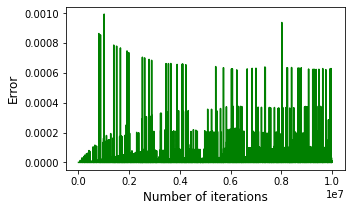

In [112]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst50, error_lst50,  color='g')
plt.xlabel('Number of iterations',fontsize=12)
plt.ylabel('Error',fontsize=12)

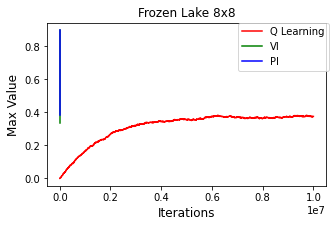

In [137]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst50, max_v_lst50,  color='r', label ='Q Learning')
plt.plot(iter_lst33, max_v_lst33,  color='g', label ='VI')
plt.plot(iter_lst45, max_v_lst45,  color='b', label = 'PI')

plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
plt.title('Frozen Lake 8x8')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

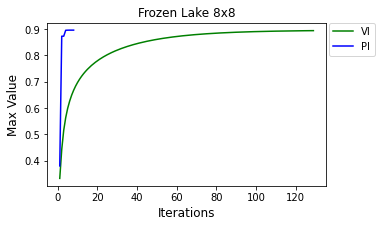

In [138]:
plt.figure(figsize=(5,3))
#plt.plot(iter_lst50, max_v_lst50,  color='r', label ='Q Learning')
plt.plot(iter_lst33, max_v_lst33,  color='g', label ='VI')
plt.plot(iter_lst45, max_v_lst45,  color='b', label = 'PI')

plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
plt.title('Frozen Lake 8x8')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [ ]:
# frozen lake 35x35  Q Learning

Text(0, 0.5, 'value')

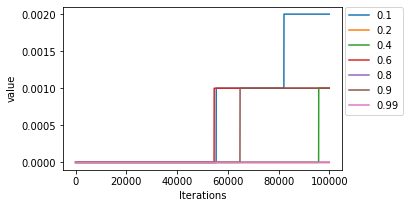

In [120]:
# hyperparameter tuning for alpha
plt.rcParams["figure.figsize"] = (5,3)

alpha_lst = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9, 0.99]

for alpha in alpha_lst:
    alpha_lst52=[]
    iter_lst52=[]
    max_v_lst52=[]
    mean_v_lst52=[]
    #error_lst48 =[]
    #v0_lst48=[]
    pi_q8 = mdptoolbox.mdp.QLearning(P2, R2, gamma=0.99, alpha=alpha, alpha_min=0.001, alpha_decay=0.99, n_iter=100000)
    stats13=pi_q8.run()
    
    for i in stats13:
        max_v_lst52.append(i['Max V'])
        mean_v_lst52.append(i['Mean V'])
        #time_lst46.append(i['Time'])
        iter_lst52.append(i['Iteration'])
        #error_lst52.append(i['Error'])
        #v0_lst52.append(i['V[0]'])
        alpha_lst52.append(i['Alpha'])
    plt.plot(iter_lst52, max_v_lst52, label = alpha)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('value')

Text(0, 0.5, 'value')

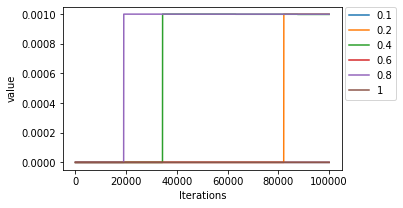

In [121]:
# hyperparameter tuning for epsilon
plt.rcParams["figure.figsize"] = (5,3)

epsilon_lst = [0.1, 0.2, 0.4, 0.6, 0.8, 1]

for epsilon in epsilon_lst:
    alpha_lst53=[]
    iter_lst53=[]
    max_v_lst53=[]
    mean_v_lst53=[]
    pi_q9 = mdptoolbox.mdp.QLearning(P2, R2, gamma=0.99, alpha=0.1, alpha_min=0.001, alpha_decay=0.99, n_iter=100000, epsilon =epsilon, epsilon_min=0.1, epsilon_decay=0.99)
    stats14=pi_q9.run()
    
    for i in stats14:
        max_v_lst53.append(i['Max V'])
        mean_v_lst53.append(i['Mean V'])
        iter_lst53.append(i['Iteration'])
        alpha_lst53.append(i['Alpha'])
    plt.plot(iter_lst53, max_v_lst53, label = epsilon)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xlabel('Iterations')
plt.ylabel('value')

In [130]:
pi_q1000_2 = mdptoolbox.mdp.QLearning(P2, R2, gamma=0.99, alpha=0.1, alpha_min=0.001, alpha_decay=0.99, n_iter=10000000, epsilon =0.8, epsilon_min=0.1, epsilon_decay=0.99)
stats16=pi_q1000_2.run()

In [310]:
#stats16

In [131]:
alpha_lst55=[]
iter_lst55=[]
max_v_lst55=[]
mean_v_lst55=[]
error_lst55 =[]
v0_lst55=[]
epsilon_lst55=[]
time_lst55=[]
reward_lst55=[]
state_lst55=[]
for i in stats16:
    alpha_lst55.append(i['Alpha'])
    iter_lst55.append(i['Iteration'])
    max_v_lst55.append(i['Max V'])
    mean_v_lst55.append(i['Mean V'])
    error_lst55.append(i['Error'])
    v0_lst55.append(i['V[0]'])
    epsilon_lst55.append(i['Epsilon'])
    time_lst55.append(i['Time'])
    reward_lst55.append(i['Reward'])
    state_lst55.append(i['State'])

Text(0, 0.5, 'Max Value')

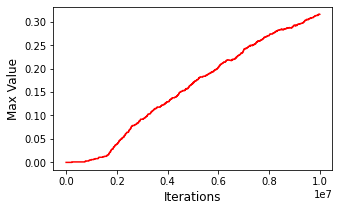

In [132]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst55, max_v_lst55,  color='r')
plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)

Text(0, 0.5, 'Mean Value')

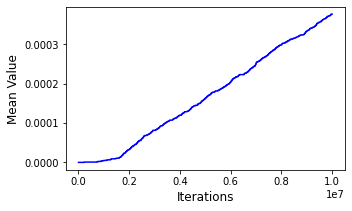

In [133]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst55, mean_v_lst55,  color='b')
plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Mean Value',fontsize=12)

Text(0, 0.5, 'Error')

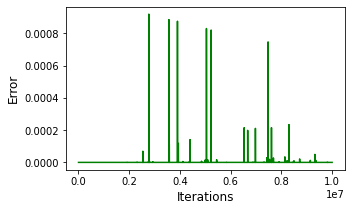

In [134]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst55, error_lst55,  color='g')
plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Error',fontsize=12)

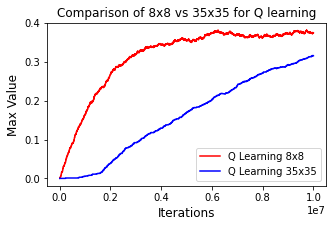

In [142]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst50, max_v_lst50,  color='r', label ='Q Learning 8x8')
plt.plot(iter_lst55, max_v_lst55,  color='b', label ='Q Learning 35x35')
plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
plt.title('Comparison of 8x8 vs 35x35 for Q learning')
plt.legend(loc='lower right',fontsize=10)

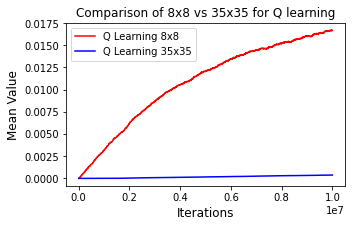

In [286]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst50, mean_v_lst50,  color='r', label ='Q Learning 8x8')
plt.plot(iter_lst55, mean_v_lst55,  color='b', label ='Q Learning 35x35')
plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Mean Value',fontsize=12)
plt.title('Comparison of 8x8 vs 35x35 for Q learning')
plt.legend(loc='upper left',fontsize=10)

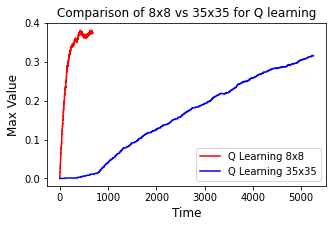

In [141]:
plt.figure(figsize=(5,3))
plt.plot(time_lst50, max_v_lst50,  color='r', label ='Q Learning 8x8')
plt.plot(time_lst55, max_v_lst55,  color='b', label ='Q Learning 35x35')
plt.xlabel('Time',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
plt.title('Comparison of 8x8 vs 35x35 for Q learning')
plt.legend(loc='lower right',fontsize=10)

In [ ]:
# comparison of all algos with problem size

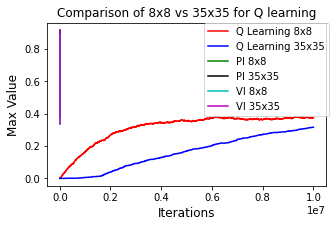

In [145]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst50, max_v_lst50,  color='r', label ='Q Learning 8x8')
plt.plot(iter_lst55, max_v_lst55,  color='b', label ='Q Learning 35x35')
plt.plot(iter_lst45, max_v_lst45,  color='g', label ='PI 8x8')
plt.plot(iter_lst46, max_v_lst46,  color='k', label ='PI 35x35')
plt.plot(iter_lst33, max_v_lst33,  color='c', label ='VI 8x8')
plt.plot(iter_lst22, max_v_lst22,  color='m', label ='VI 35x35')

plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
plt.title('Comparison of 8x8 vs 35x35 for Q learning')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

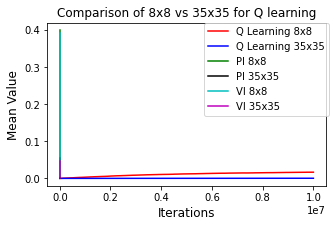

In [289]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst50, mean_v_lst50,  color='r', label ='Q Learning 8x8')
plt.plot(iter_lst55, mean_v_lst55,  color='b', label ='Q Learning 35x35')
plt.plot(iter_lst45, mean_v_lst45,  color='g', label ='PI 8x8')
plt.plot(iter_lst46, mean_v_lst46,  color='k', label ='PI 35x35')
plt.plot(iter_lst33, mean_v_lst33,  color='c', label ='VI 8x8')
plt.plot(iter_lst22, mean_v_lst22,  color='m', label ='VI 35x35')

plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Mean Value',fontsize=12)
plt.title('Comparison of 8x8 vs 35x35 for Q learning')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

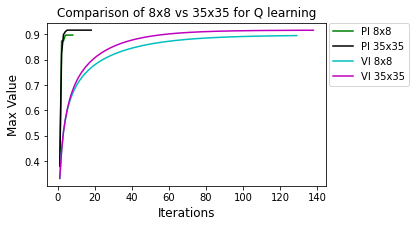

In [146]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst45, max_v_lst45,  color='g', label ='PI 8x8')
plt.plot(iter_lst46, max_v_lst46,  color='k', label ='PI 35x35')
plt.plot(iter_lst33, max_v_lst33,  color='c', label ='VI 8x8')
plt.plot(iter_lst22, max_v_lst22,  color='m', label ='VI 35x35')

plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Max Value',fontsize=12)
plt.title('Comparison of 8x8 vs 35x35 for Q learning')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [304]:
max(max_v_lst45), max(max_v_lst46), max(max_v_lst33), max(max_v_lst22), max(max_v_lst50), max(max_v_lst55)

(0.8961514651201531,
 0.9156058755996687,
 0.894211955550239,
 0.9151943090314627,
 0.3813863506386575,
 0.3159986165163486)

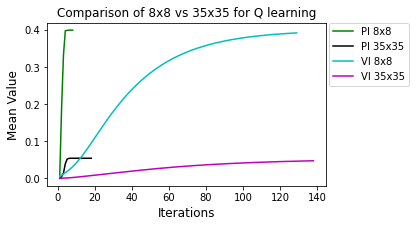

In [288]:
plt.figure(figsize=(5,3))
plt.plot(iter_lst45, mean_v_lst45,  color='g', label ='PI 8x8')
plt.plot(iter_lst46, mean_v_lst46,  color='k', label ='PI 35x35')
plt.plot(iter_lst33, mean_v_lst33,  color='c', label ='VI 8x8')
plt.plot(iter_lst22, mean_v_lst22,  color='m', label ='VI 35x35')

plt.xlabel('Iterations',fontsize=12)
plt.ylabel('Mean Value',fontsize=12)
plt.title('Comparison of 8x8 vs 35x35 for Q learning')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

In [305]:
max(mean_v_lst45), max(mean_v_lst46), max(mean_v_lst33), max(mean_v_lst22), max(mean_v_lst50), max(mean_v_lst55)

(0.3994023865476295,
 0.05450752674693596,
 0.39191771774374684,
 0.04774552606266708,
 0.016703040473814955,
 0.00037654311686326496)

In [ ]:
# making different dataframes for comparing time and iterations for different algo and diff problem sizes

In [149]:
df_64_pi = pd.DataFrame(list(zip(iter_lst45, time_lst45)), columns =['Iterations', 'Time'])

In [311]:
#df_64_pi

In [151]:
df_64_pi['Algorithm']='PI'

In [312]:
#df_64_pi

In [283]:
np.mean(df_64_pi['Time'])

0.010248452425003052

In [153]:
df_64_vi = pd.DataFrame(list(zip(iter_lst33, time_lst33)), columns =['Iterations', 'Time'])

In [154]:
df_64_vi['Algorithm']='VI'

In [313]:
#df_64_vi

In [280]:
np.mean(df_64_vi['Time'])

0.029426964678505595

In [156]:
df_64_pi_vi= pd.concat([df_64_pi, df_64_vi], axis=0)

In [157]:
df_64_pi_vi.shape

(137, 3)

In [178]:
df_64_q = pd.DataFrame(list(zip(iter_lst50, time_lst50)), columns =['Iterations', 'Time'])

In [314]:
#df_64_q

In [180]:
df_64_q['Algorithm']='Q'

In [181]:
df_64_pi_vi_q= pd.concat([df_64_pi, df_64_vi,df_64_q], axis=0)

In [182]:
df_64_pi_vi_g_q = df_64_pi_vi_q.groupby(['Algorithm']).agg({'Iterations':'max','Time':'sum'})

In [183]:
df_64_pi_vi_g_q

,Iterations,Time
Algorithm,,
PI,8,8.198762e-02
Q,10000000,3.400133e+06
VI,129,3.796078e+00


In [185]:
df_64_pi_vi_g_q.reset_index(inplace=True)
df_64_pi_vi_g_q = df_64_pi_vi_g_q.rename(columns = {'Algorithm':'Algorithm'})
df_64_pi_vi_g_q['Size']= '8x8'

In [186]:
df_64_pi_vi_g_q

,index,Algorithm,Iterations,Time,Size
0,0,PI,8,8.198762e-02,8x8
1,1,Q,10000000,3.400133e+06,8x8
2,2,VI,129,3.796078e+00,8x8


In [187]:
df_1225_pi = pd.DataFrame(list(zip(iter_lst46, time_lst46)), columns =['Iterations', 'Time'])

In [188]:
df_1225_pi['Algorithm']='PI'

In [315]:
#df_1225_pi

In [282]:
np.mean(df_1225_pi['Time'])

0.5636372301313612

In [196]:
df_1225_vi = pd.DataFrame(list(zip(iter_lst22, time_lst22)), columns =['Iterations', 'Time'])
df_1225_vi["Algorithm"]='VI'

In [316]:
#df_1225_vi

In [281]:
np.mean(df_1225_vi['Time'])

0.1085825761159261

In [198]:
df_1225_q = pd.DataFrame(list(zip(iter_lst55, time_lst55)), columns =['Iterations', 'Time'])
df_1225_q["Algorithm"]='Q'

In [317]:
#df_1225_q

In [318]:
df_1225_pi_vi_q= pd.concat([df_1225_pi, df_1225_vi,df_1225_q], axis=0)
#df_1225_pi_vi_q

In [209]:
df_1225_pi_vi_q.reset_index(inplace=True)
df_1225_pi_vi_q = df_1225_pi_vi_q.rename(columns = {'Algorithm':'Algorithm'})

In [210]:
df_1225_pi_vi_q = df_1225_pi_vi_q.groupby(['Algorithm']).agg({'Iterations':'max','Time':'sum'})
#df_1225_pi_vi_q= df_1225_pi_vi_q.groupby(['Algorithm']).agg({'Iterations':'max','Time':'sum'})
df_1225_pi_vi_q['Size'] = '35x35'

In [211]:
df_1225_pi_vi_q

,Iterations,Time,Size
Algorithm,,,
PI,18,1.014547e+01,35x35
Q,10000000,2.604749e+07,35x35
VI,138,1.498440e+01,35x35


In [212]:
df_1225_pi_vi_q.reset_index(inplace=True)
df_1225_pi_vi_q = df_1225_pi_vi_q.rename(columns = {'Algorithm':'Algorithm'})

In [215]:
df_1225_pi_vi_q

,Algorithm,Iterations,Time,Size
0,PI,18,1.014547e+01,35x35
1,Q,10000000,2.604749e+07,35x35
2,VI,138,1.498440e+01,35x35


In [216]:
combined_df=pd.concat([df_64_pi_vi_g_q, df_1225_pi_vi_q], axis=0)
combined_df.reset_index(inplace=True)

In [218]:
combined_df=combined_df.drop(['index'], axis=1)

In [220]:
combined_df=combined_df.drop(['level_0'], axis=1)

In [221]:
combined_df

,Algorithm,Iterations,Time,Size
0,PI,8,8.198762e-02,8x8
1,Q,10000000,3.400133e+06,8x8
2,VI,129,3.796078e+00,8x8
3,PI,18,1.014547e+01,35x35
4,Q,10000000,2.604749e+07,35x35
5,VI,138,1.498440e+01,35x35


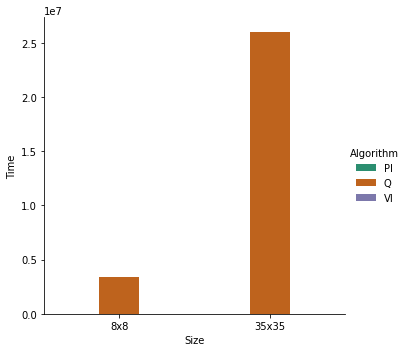

In [222]:
# comparing diff algo and sizes 
sns.catplot(x='Size',y='Time',hue='Algorithm',kind='bar',data=combined_df, palette='Dark2')

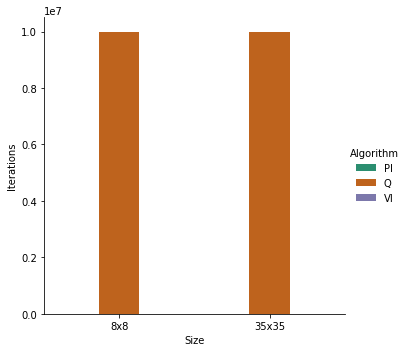

In [223]:
# comparing diff algo and sizes 
sns.catplot(x='Size',y='Iterations',hue='Algorithm',kind='bar',data=combined_df, palette='Dark2')

In [224]:
combined_df_dropped_q=combined_df.drop(combined_df[combined_df['Algorithm']=='Q'].index)

In [225]:
combined_df_dropped_q

,Algorithm,Iterations,Time,Size
0,PI,8,0.081988,8x8
2,VI,129,3.796078,8x8
3,PI,18,10.145470,35x35
5,VI,138,14.984396,35x35


Text(29.109759615384625, 0.5, 'Time')

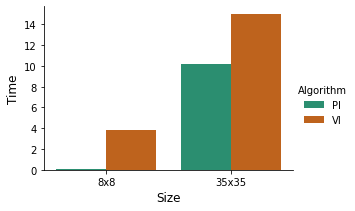

In [299]:
sns.catplot( x='Size',y='Time',hue='Algorithm',kind='bar',data=combined_df_dropped_q, palette='Dark2',height=3, aspect=11.7/8.27)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Time', fontsize=12)

Text(30.275550807217485, 0.5, 'Iterations')

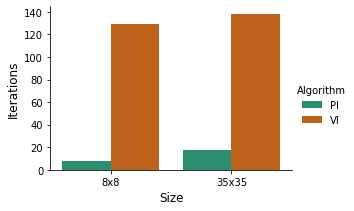

In [300]:
sns.catplot(x='Size',y='Iterations',hue='Algorithm',kind='bar',data=combined_df_dropped_q, palette='Dark2', height=3, aspect=11.7/8.27)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Iterations', fontsize=12)

In [230]:
combined_df

,Algorithm,Iterations,Time,Size
0,PI,8,8.198762e-02,8x8
1,Q,10000000,3.400133e+06,8x8
2,VI,129,3.796078e+00,8x8
3,PI,18,1.014547e+01,35x35
4,Q,10000000,2.604749e+07,35x35
5,VI,138,1.498440e+01,35x35


In [231]:
combined_df_pi = combined_df[combined_df['Algorithm']=='PI']
combined_df_vi = combined_df[combined_df['Algorithm']=='VI']
combined_df_q = combined_df[combined_df['Algorithm']=='Q']

In [232]:
combined_df_pi

,Algorithm,Iterations,Time,Size
0,PI,8,0.081988,8x8
3,PI,18,10.145470,35x35


In [233]:
combined_df_vi

,Algorithm,Iterations,Time,Size
2,VI,129,3.796078,8x8
5,VI,138,14.984396,35x35


In [234]:
combined_df_q

,Algorithm,Iterations,Time,Size
1,Q,10000000,3.400133e+06,8x8
4,Q,10000000,2.604749e+07,35x35


Text(0.5, 1.0, 'Q learning')

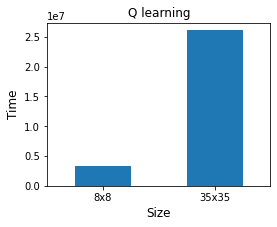

In [253]:
#plt.figure(figsize=(2,1))
fig, ax= plt.subplots(figsize=(4,3))
#plt.subplots(figsize=(2,1))
combined_df_q.plot('Size','Time', kind='bar', legend=None, ax=ax)
plt.xticks(rotation = 360)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Time', fontsize=12)
plt.title('Q learning')

Text(0.5, 1.0, 'Q learning')

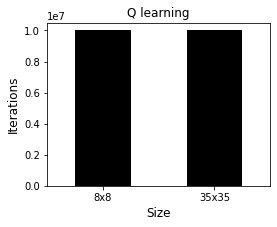

In [258]:
#plt.figure(figsize=(2,1))
fig, ax= plt.subplots(figsize=(4,3))
#plt.subplots(figsize=(2,1))
combined_df_q.plot('Size','Iterations', kind='bar', legend=None, ax=ax, color='k')
plt.xticks(rotation = 360)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Iterations', fontsize=12)
plt.title('Q learning')

Text(0.5, 1.0, 'VI')

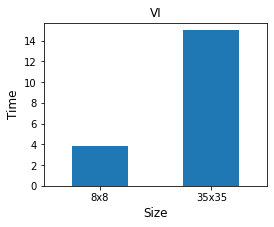

In [255]:
#plt.figure(figsize=(2,1))
fig, ax= plt.subplots(figsize=(4,3))
#plt.subplots(figsize=(2,1))
combined_df_vi.plot('Size','Time', kind='bar', legend=None, ax=ax)
plt.xticks(rotation = 360)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Time', fontsize=12)
plt.title('VI')

Text(0.5, 1.0, 'VI')

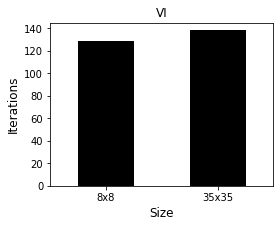

In [259]:
#plt.figure(figsize=(2,1))
fig, ax= plt.subplots(figsize=(4,3))
#plt.subplots(figsize=(2,1))
combined_df_vi.plot('Size','Iterations', kind='bar', legend=None, ax=ax, color='k')
plt.xticks(rotation = 360)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Iterations', fontsize=12)
plt.title('VI')

Text(0.5, 1.0, 'PI')

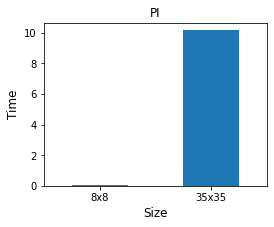

In [256]:
#plt.figure(figsize=(2,1))
fig, ax= plt.subplots(figsize=(4,3))
#plt.subplots(figsize=(2,1))
combined_df_pi.plot('Size','Time', kind='bar', legend=None, ax=ax)
plt.xticks(rotation = 360)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Time', fontsize=12)
plt.title('PI')

Text(0.5, 1.0, 'PI')

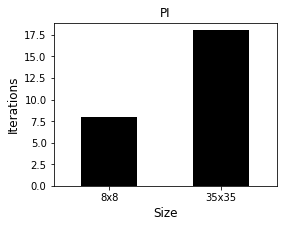

In [260]:
#plt.figure(figsize=(2,1))
fig, ax= plt.subplots(figsize=(4,3))
#plt.subplots(figsize=(2,1))
combined_df_pi.plot('Size','Iterations', kind='bar', legend=None, ax=ax, color='k')
plt.xticks(rotation = 360)
plt.xlabel('Size', fontsize=12)
plt.ylabel('Iterations', fontsize=12)
plt.title('PI')